### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
# Before I do ANYTHING else, the obvious misspelling of "passenger" is going to drive me insane, so I'll fix that real quick.
data = data.rename(columns = {"passanger" : "passenger"})

data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Let's just have a look first.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
# Now, I'll check for null values.
data.isnull().sum()

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
# There's clearly something going on with the "car" column... What data is it supposed to have?
data["car"].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [7]:
# Let's have another look at the other columns with missing data, too.
data["Bar"].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [8]:
data["CoffeeHouse"].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [9]:
data["CarryAway"].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [10]:
data["RestaurantLessThan20"].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [11]:
data["Restaurant20To50"].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [12]:
# The "car" column is pretty much useless. May as well get rid of it.
data = data.drop("car", axis=1)
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [13]:
# As for the remaining missing values, I can't think of a good way to approximate or find a substitute value for any of them.
# Still, the remaining rows still have plenty of useful data, so I'll make a new dataframe instead of replacing the one I have
# Let's check how many rows and columns we have, drop the rest of the null values, and check again.
data.shape

(12684, 25)

In [14]:
data_nullsDropped = data.dropna()
data.shape[0] - data_nullsDropped.shape[0]

605

In [15]:
# We lost 605 rows, but we still have a lot left. We'll use the nullsdropped dataframe if we need those columns, and the original if we don't.

4. What proportion of the total observations chose to accept the coupon?



In [16]:
# Y is already a boolean series, and it has no null values, so this statement should do nicely.
data["Y"].sum() / data["Y"].count()

0.5684326710816777

In [17]:
# The proportion is 0.5684326710816777, or about 56.84%

5. Use a bar plot to visualize the `coupon` column.

<Axes: ylabel='coupon'>

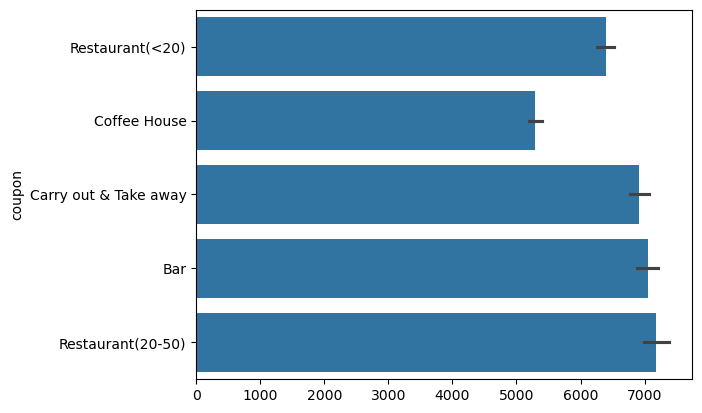

In [18]:
sns.barplot(data=data["coupon"])

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

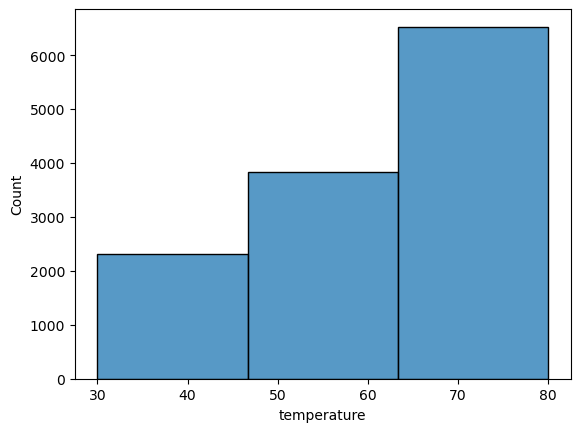

In [19]:
sns.histplot(data=data["temperature"], bins=3)

In [20]:
data["temperature"].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

In [21]:
# I'd give it more bins, but there are only three values.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:
data_justBarCoupons = data[data["coupon"] == "Bar"]

2. What proportion of bar coupons were accepted?


In [23]:
data_justBarCoupons["Y"].sum() / data_justBarCoupons["Y"].count()

0.41001487357461575

In [24]:
# The proportion is 0.41001487357461575, or about 41.00%

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [25]:
data_Bar3orLess = data_justBarCoupons[ (data_justBarCoupons["Bar"] == "never") | (data_justBarCoupons["Bar"] == "less1") | (data_justBarCoupons["Bar"] == "1~3") ]
data_BarMoreThan3 = data_justBarCoupons[ (data_justBarCoupons["Bar"] == "4~8") | (data_justBarCoupons["Bar"] == "gt8") ]

In [26]:
data_Bar3orLess["Y"].sum() / data_Bar3orLess["Y"].count()

0.37061769616026713

In [27]:
data_BarMoreThan3["Y"].sum() / data_BarMoreThan3["Y"].count()

0.7688442211055276

In [28]:
( data_BarMoreThan3["Y"].sum() / data_BarMoreThan3["Y"].count() ) - ( data_Bar3orLess["Y"].sum() / data_Bar3orLess["Y"].count() )

0.3982265249452605

In [29]:
# People who go to the bar more than 3 times a month are abouy 39.82% more likely to accept a bar coupon than those who go less.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [30]:
# In order to make a simpler comparison below, I'll be making a new column for age where string values are changed to approximate integers.
data["age_simplified_inaccurate"] = data["age"].replace(to_replace="50plus", value=50)
data["age_simplified_inaccurate"] = data["age_simplified_inaccurate"].replace(to_replace="below21", value=20)
data["age_simplified_inaccurate"] = data["age_simplified_inaccurate"].astype(int)

# I'll just remake this with the new column added.
data_justBarCoupons = data[data["coupon"] == "Bar"]

data_Bar1orMore_OverAge25_booleanMask = (data_justBarCoupons["Bar"] != "never") & (data_justBarCoupons["Bar"] != "less1") & (data_justBarCoupons["age_simplified_inaccurate"] > 25)
data_Bar1orMore_OverAge25 = data_justBarCoupons[data_Bar1orMore_OverAge25_booleanMask]
data_Not_Bar1orMore_OverAge25 = data_justBarCoupons[data_Bar1orMore_OverAge25_booleanMask != True]

In [31]:
data_Bar1orMore_OverAge25["Y"].sum() / data_Bar1orMore_OverAge25["Y"].count()

0.6818181818181818

In [32]:
data_Not_Bar1orMore_OverAge25["Y"].sum() / data_Not_Bar1orMore_OverAge25["Y"].count()

0.33417882054533926

In [33]:
( data_Bar1orMore_OverAge25["Y"].sum() / data_Bar1orMore_OverAge25["Y"].count() ) - ( data_Not_Bar1orMore_OverAge25["Y"].sum() / data_Not_Bar1orMore_OverAge25["Y"].count() )

0.3476393612728425

In [34]:
# People who go to bars more than once a month and are over 25 accept coupons about 34.76% more than those who do/are not.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [35]:
# I am assuming, for this question, that Unemployed, Student, and Retired count as occupations other than farming, fishing, and forestry.

data_question5_booleanMask = (data_justBarCoupons["Bar"] != "never") & (data_justBarCoupons["Bar"] != "less1") & (data_justBarCoupons["passenger"] != "Alone") & (data_justBarCoupons["passenger"] != "Kid(s)") & (data_justBarCoupons["occupation"] != "Farming Fishing & Forestry")
data_question5 = data_justBarCoupons[data_question5_booleanMask]
data_question5_inverted = data_justBarCoupons[data_question5_booleanMask!=True]

In [36]:
data_question5["Y"].sum() / data_question5["Y"].count()

0.7073170731707317

In [37]:
data_question5_inverted["Y"].sum() / data_question5_inverted["Y"].count()

0.37637969094922735

In [38]:
( data_question5["Y"].sum() / data_question5["Y"].count() ) - ( data_question5_inverted["Y"].sum() / data_question5_inverted["Y"].count() )

0.3309373822215043

In [39]:
# Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
# are about 33.09% more likely to accept bar coupons.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [40]:
data_question6_booleanMask1 = (data_justBarCoupons["Bar"] != "never") & (data_justBarCoupons["Bar"] != "less1") & (data_justBarCoupons["passenger"] != "Alone") & (data_justBarCoupons["passenger"] != "Kid(s)") & (data_justBarCoupons["maritalStatus"] != "Widowed")
data_question6_booleanMask2 = (data_justBarCoupons["Bar"] != "never") & (data_justBarCoupons["Bar"] != "less1") & (data_justBarCoupons["age_simplified_inaccurate"].astype(int) < 30)
data_question6_booleanMask3 = ( (data_justBarCoupons["RestaurantLessThan20"] == "4~8") | (data_justBarCoupons["RestaurantLessThan20"] == "gt8") ) & ( (data_justBarCoupons["income"] == "Less than $12500") | (data_justBarCoupons["income"] == "$12500 - $24999") | (data_justBarCoupons["income"] == "$25000 - $37499") | (data_justBarCoupons["income"] == "$37500 - $49999") )
data_question6_booleanMask = data_question6_booleanMask1 | data_question6_booleanMask2 | data_question6_booleanMask3

data_question6 = data_justBarCoupons[data_question6_booleanMask]
data_question6_inverted = data_justBarCoupons[data_question6_booleanMask != True]

In [41]:
data_question6["Y"].sum() / data_question6["Y"].count()

0.5682492581602374

In [42]:
data_question6_inverted["Y"].sum() / data_question6_inverted["Y"].count()

0.33060312732688013

In [43]:
( data_question6["Y"].sum() / data_question6["Y"].count() ) - (data_question6_inverted["Y"].sum() / data_question6_inverted["Y"].count())

0.23764613083335728

In [44]:
# Customers who meet the criteria are 23.76% more likely to accept a bar coupon than those that don't.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [45]:
# It seems as though the biggest predictor of whether one accepts a bar coupon is how often they go to bars?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Preliminary exploration begin here. (Scroll further down for exploration proper.)

First of all, I'm just going to examine how every variable relates to Y.
That's right. Every single one. Whee!
Think of this as the exploratory phase. I'd make the charts nicer, but they're just here for me to snoop around.

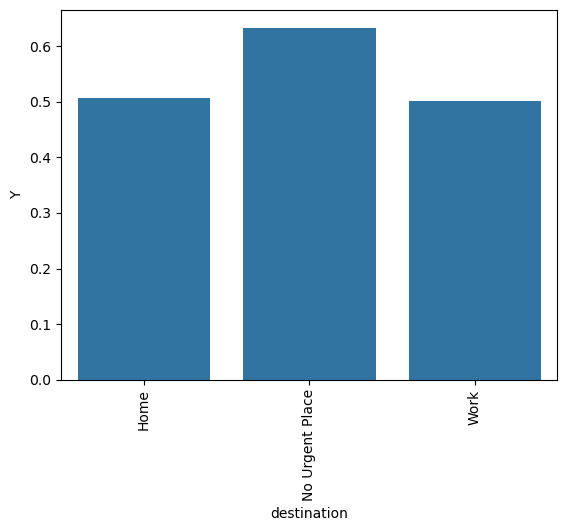

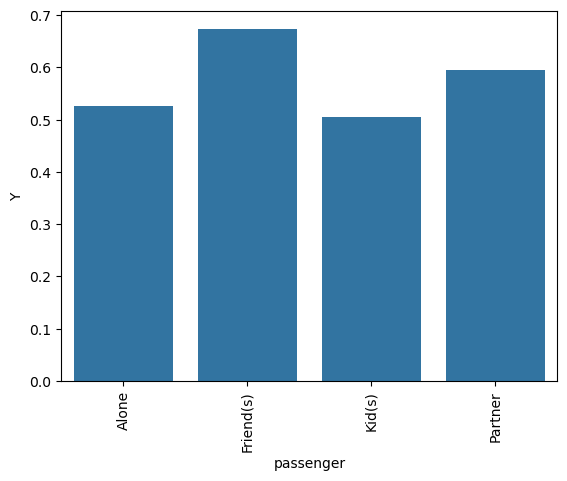

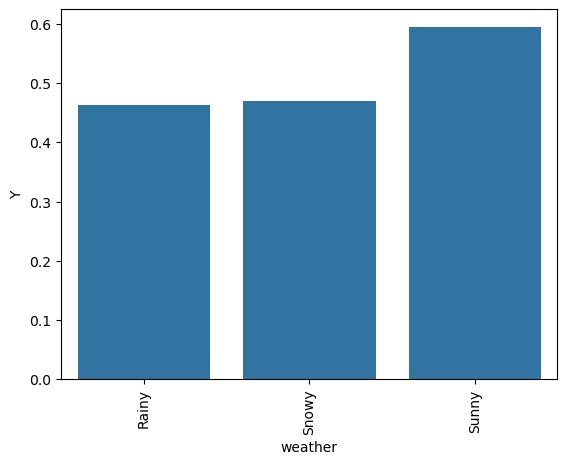

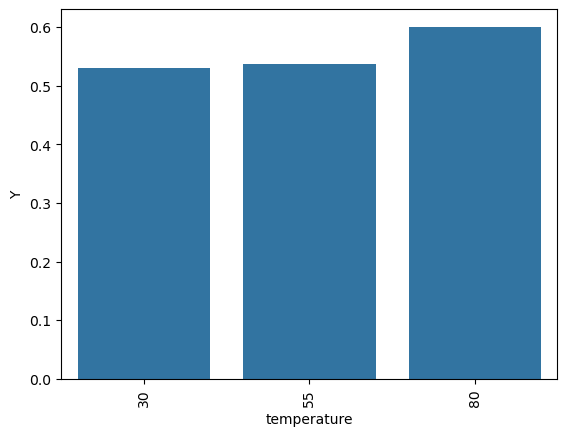

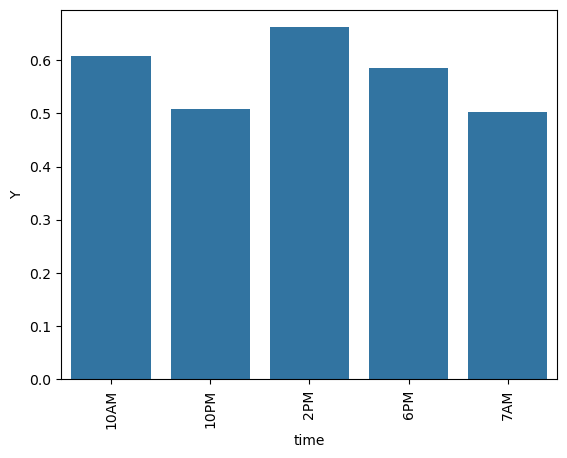

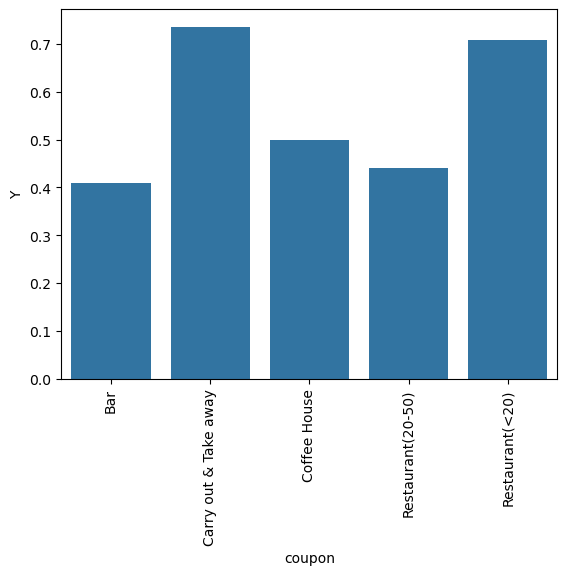

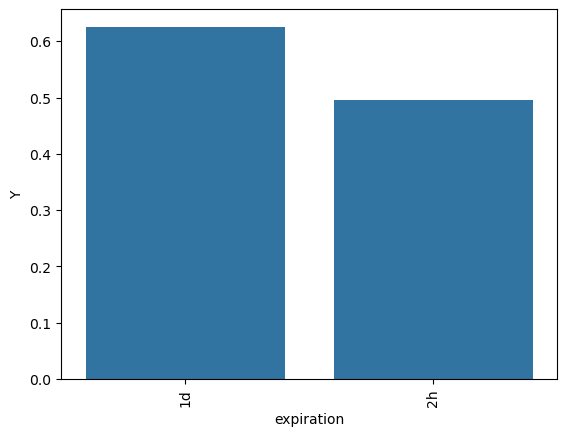

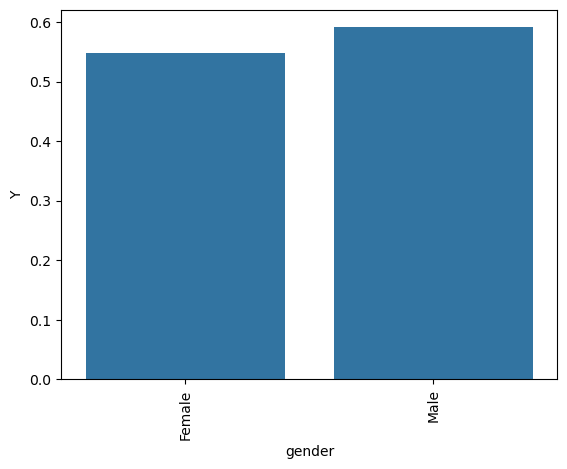

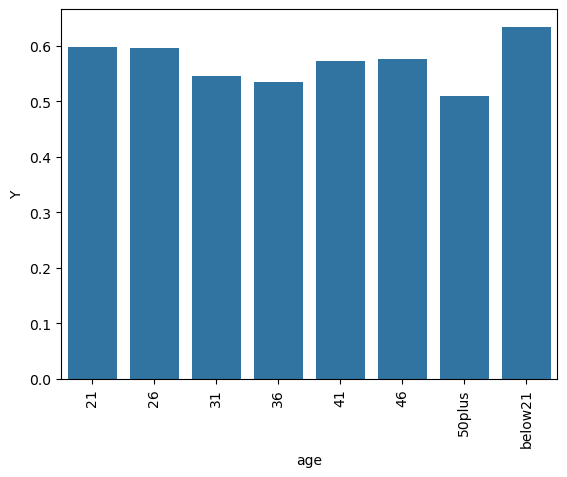

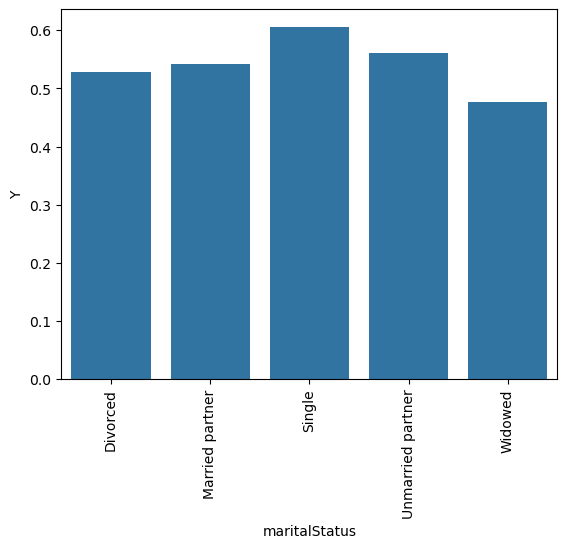

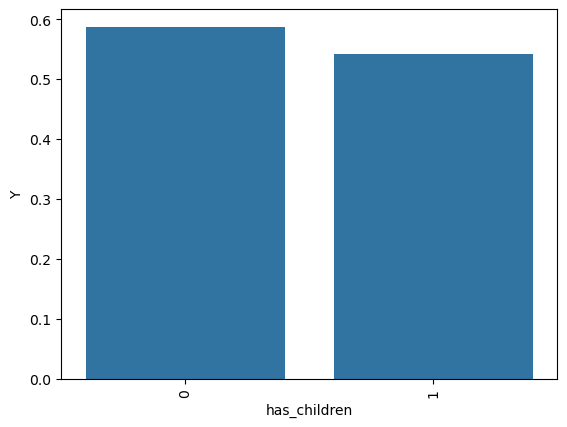

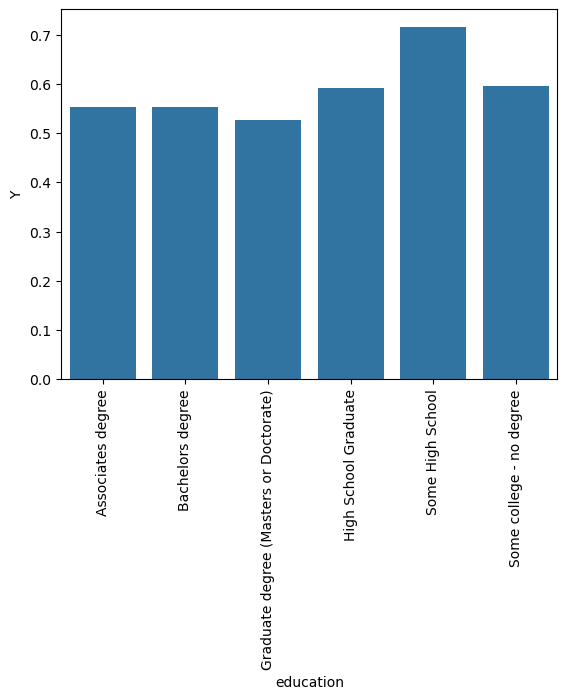

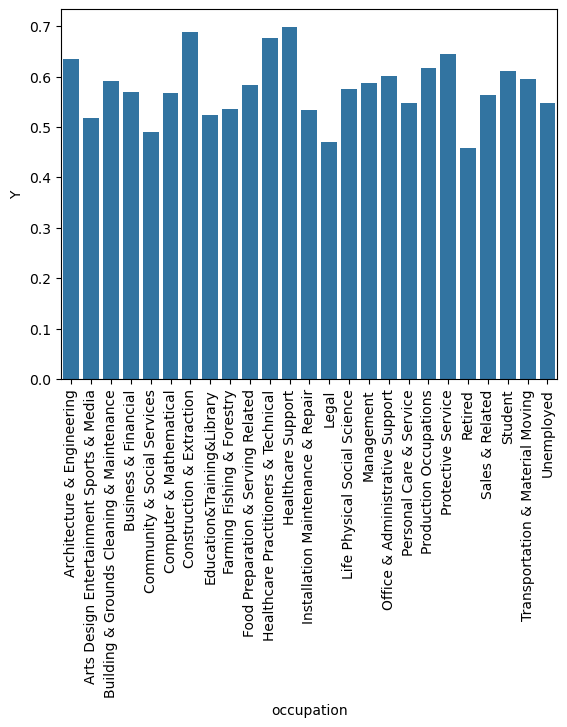

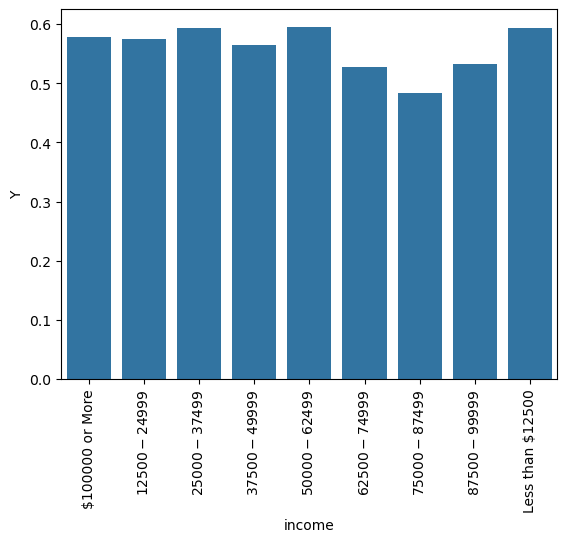

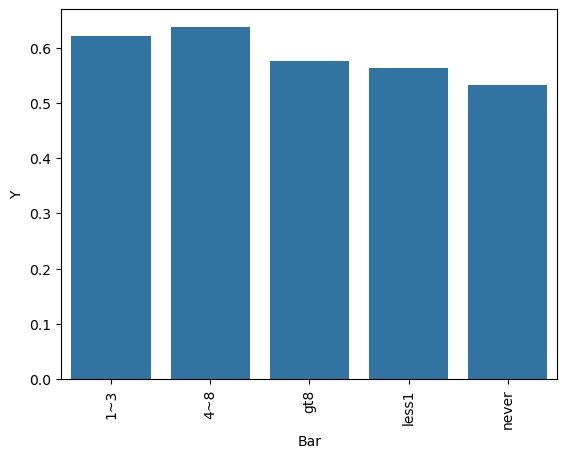

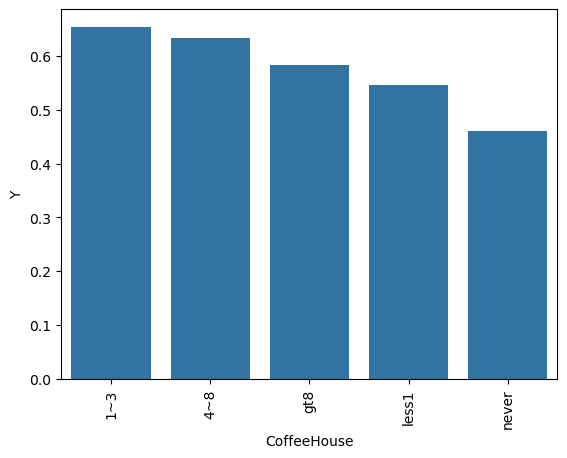

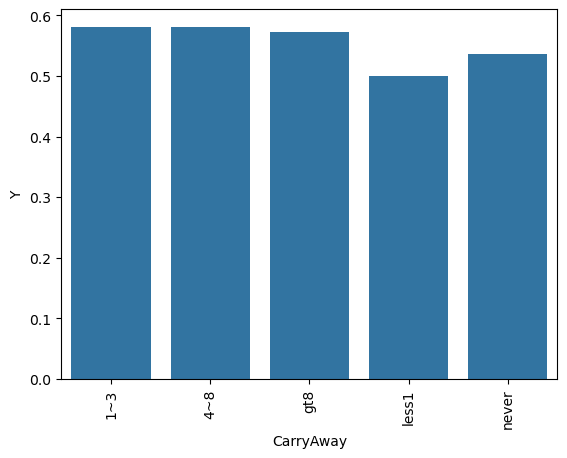

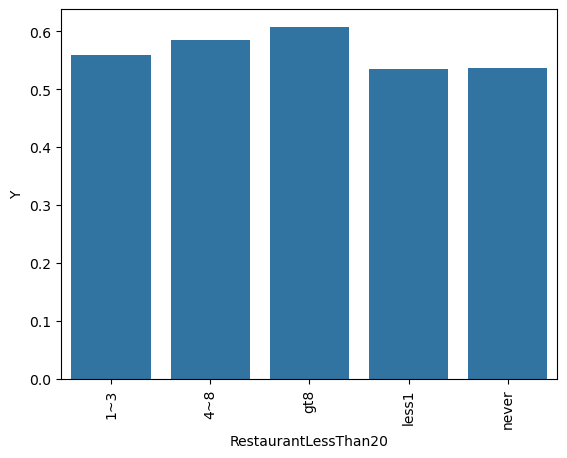

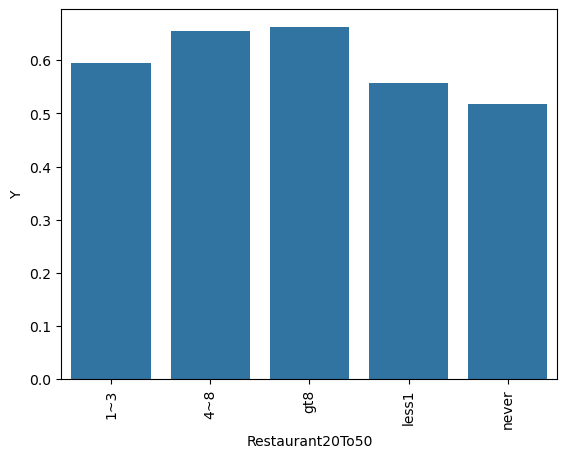

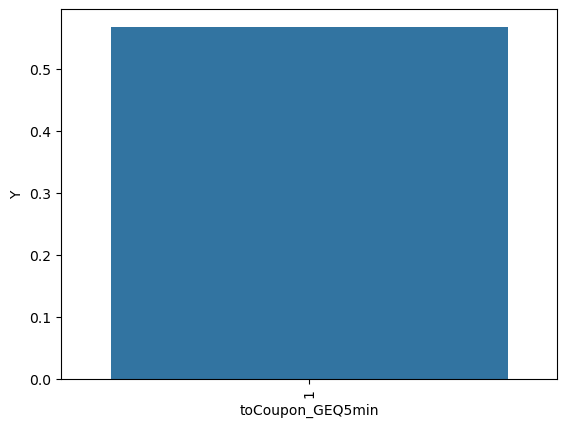

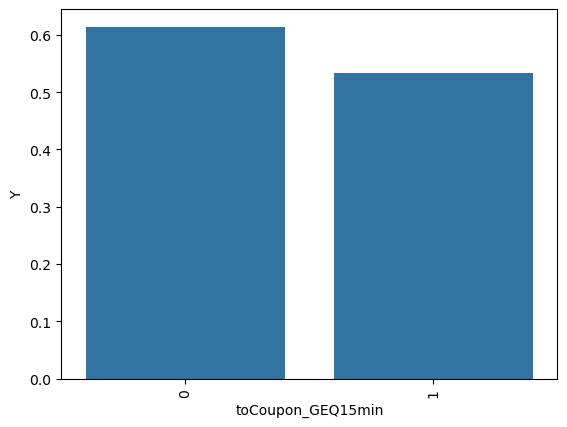

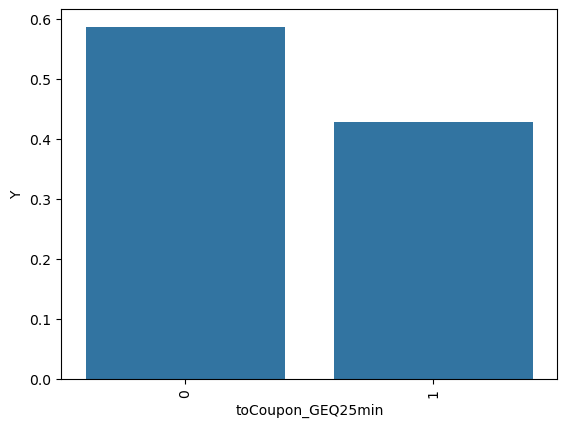

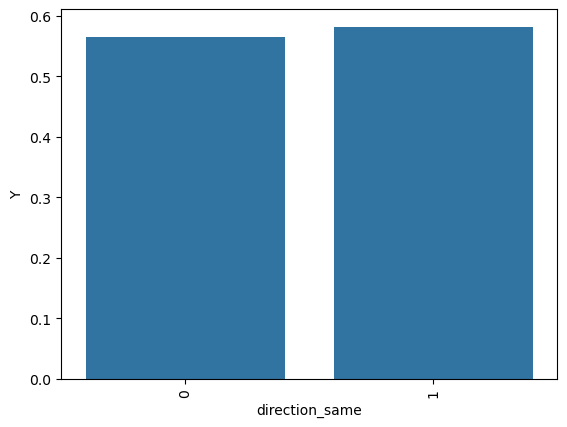

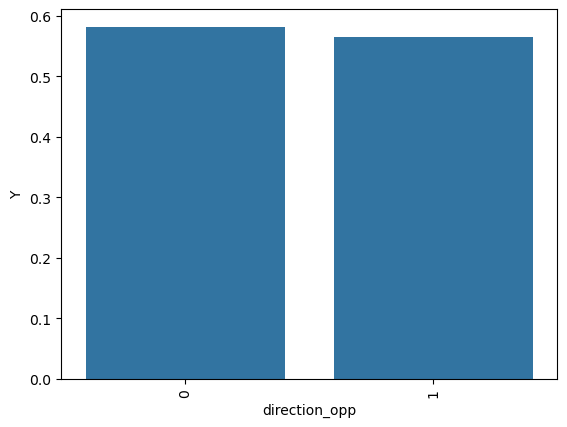

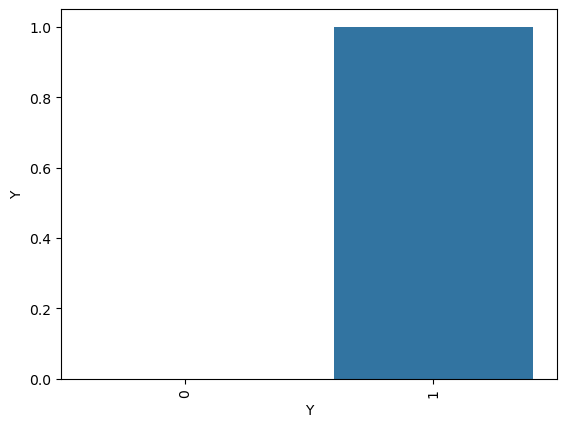

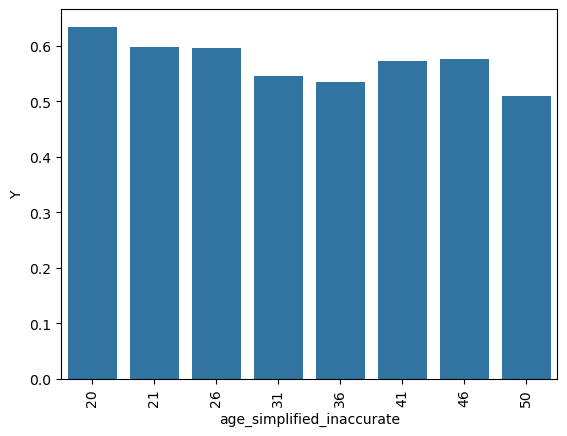

In [46]:
# All I'm doing here is going through every column and for each potential value,
# adding up the number of coupon uses, and dividing it by the total number of coupon offers.
# Essentially, it's a ratio with a range of 0-1 of whether or not the customer uses the coupon when offered.
# ex) 0.6 means that there's a 60% chance the person accepted the coupon.

for column in data:
    plt.clf()
    plt.xticks(rotation=90)
    sns.barplot(data.groupby([column])["Y"].sum()/data.groupby([column])["Y"].count())
    plt.show()

In [47]:
# What can we observe from the general data?

# People are most likely to accept coupons if:
# not going anywhere urgently (not home or work)
# driving with friends
# sunny weather
# 80 degree temperatures
# 2PM
# takeout coupon
# coupon expires in 1 day
# male
# below 21
# single
# has no children
# highest education level is some high school
# career is healthcare support
# income is $50,000-$62,499 annually
# goes to the bar 4-8 times a month
# goes to coffee houses 1-3 times a month
# gets takeout 4-8 times a month
# goes to cheap restaurants >8 times a month
# goes to expensive restaurants >8 times a month
# heading in the same direction as the coupon venue
# not heading in the opposite direction

# That's neat, but it's far from the whole story. For example, the people in the healthcare field probably aren't the same as the ones under 21.

# Follow-up questions:
# What coupons are the healthcare support workers most likely to be using?
# What about the people under 21?
# Are the people with some highschool education mostly under 21 or highschool dropouts?

# So let's get more granular! Yay!

Now I'm going to see how every variable relates to Y for just bar coupons.

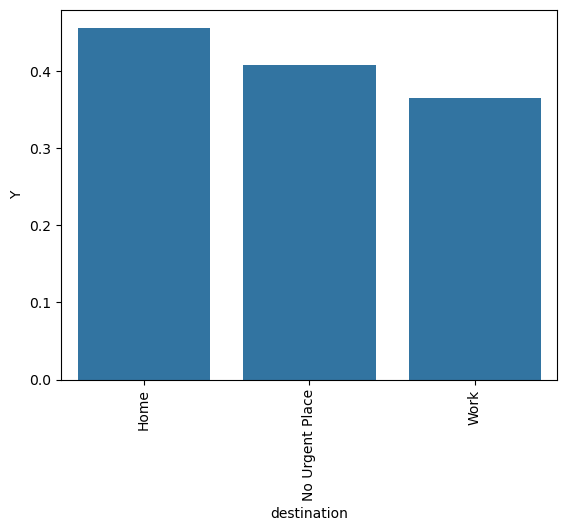

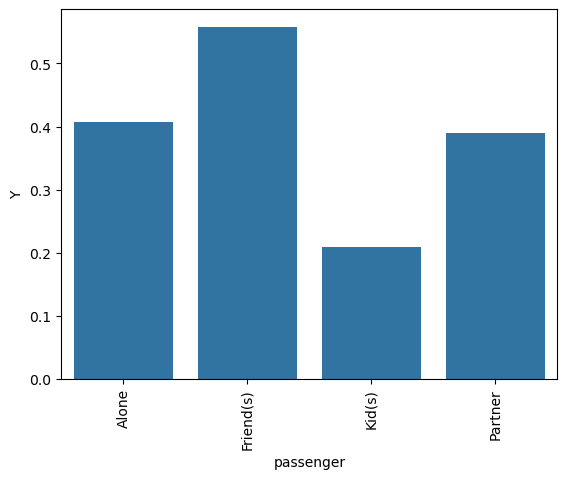

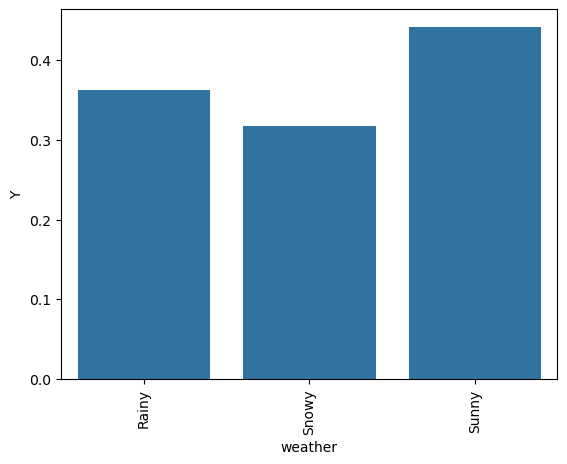

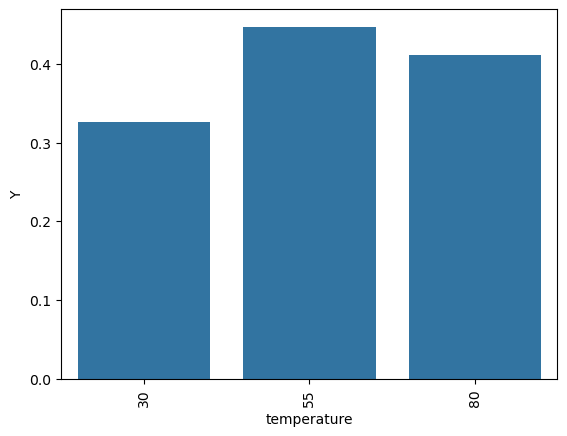

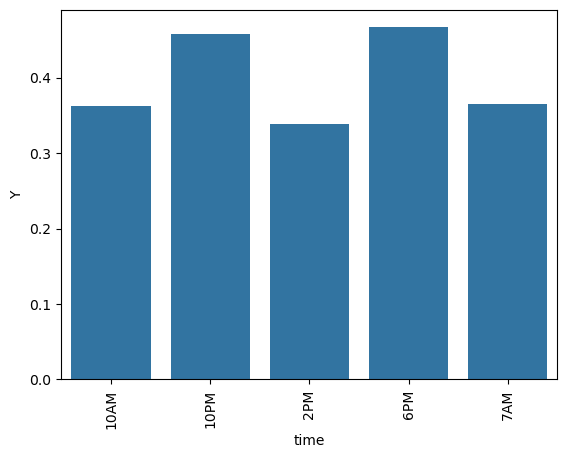

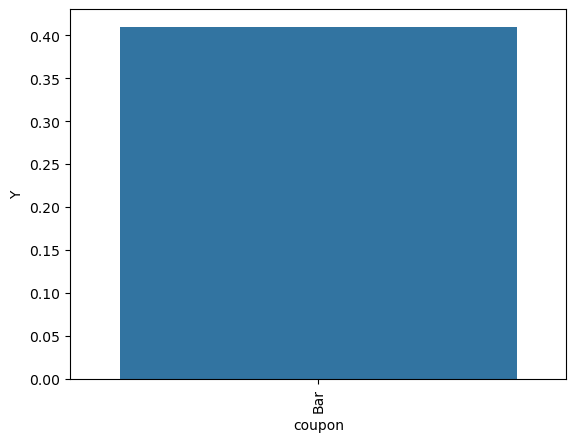

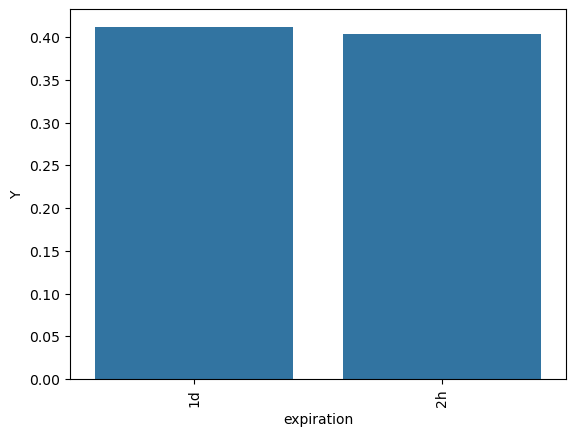

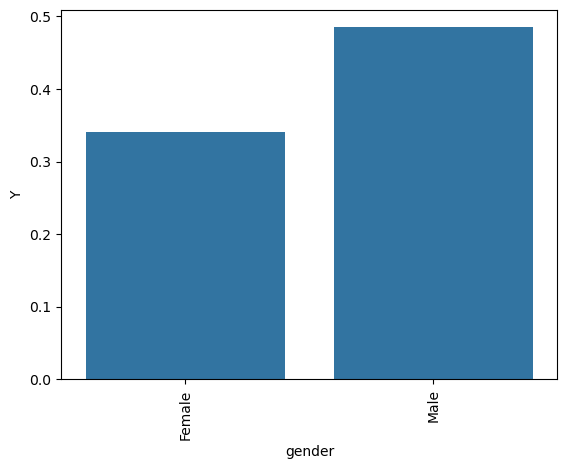

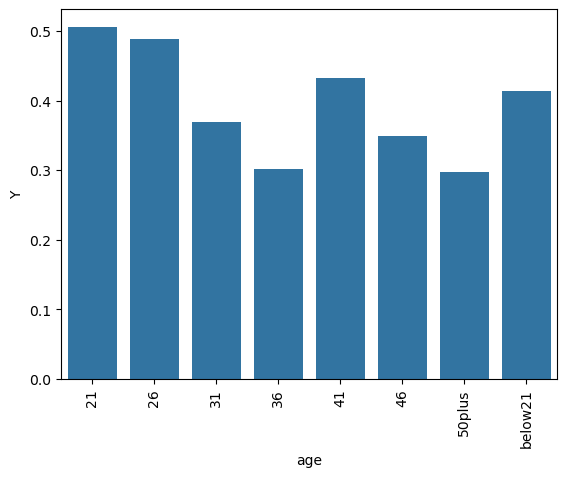

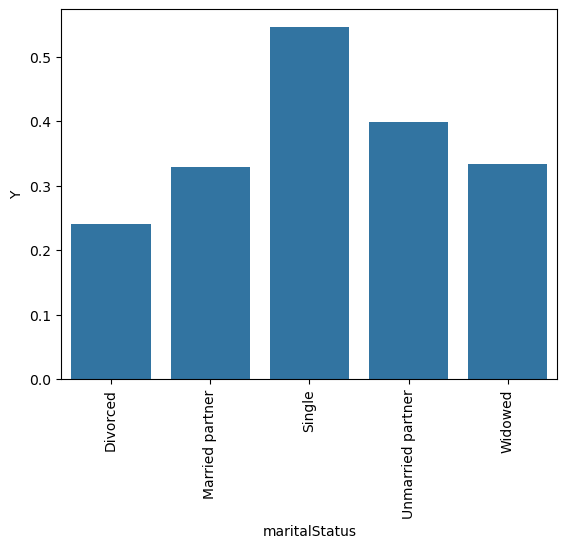

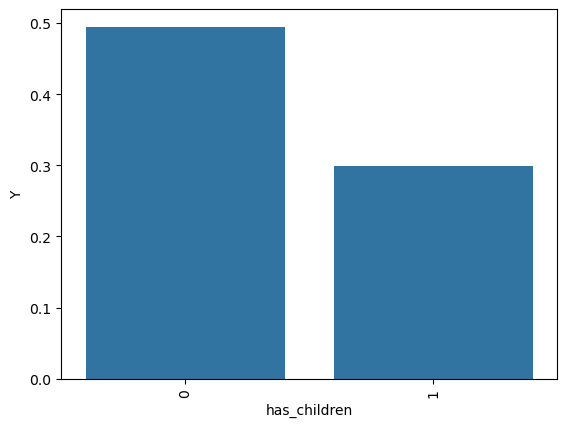

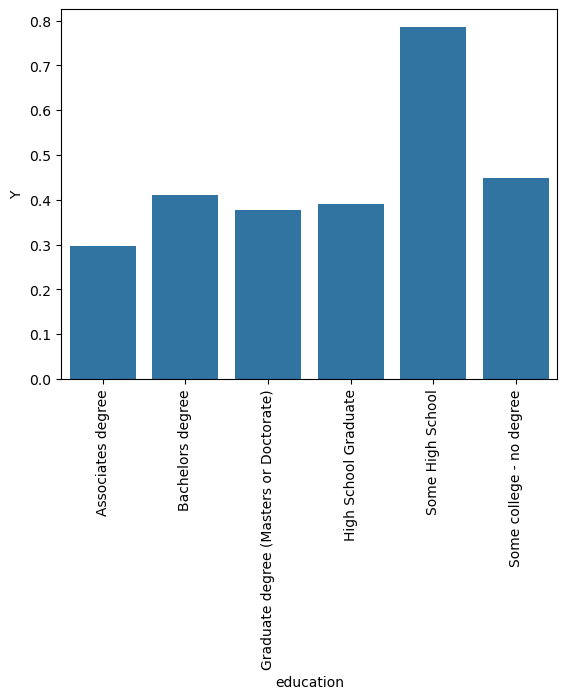

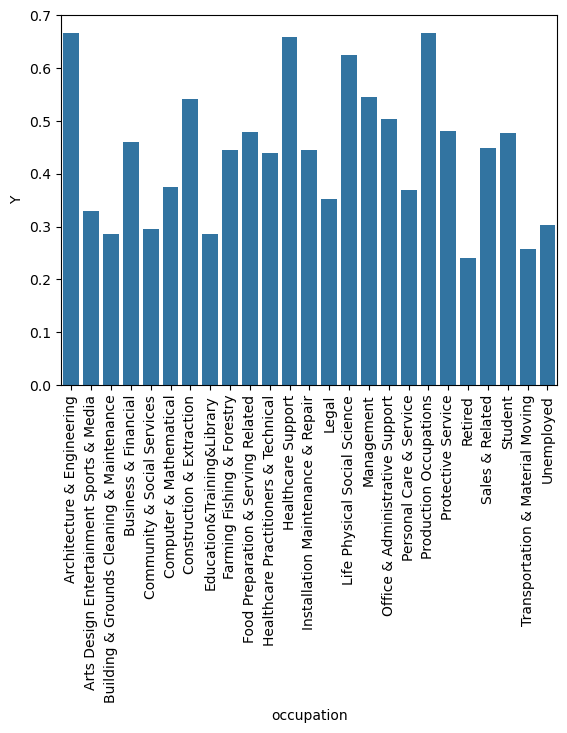

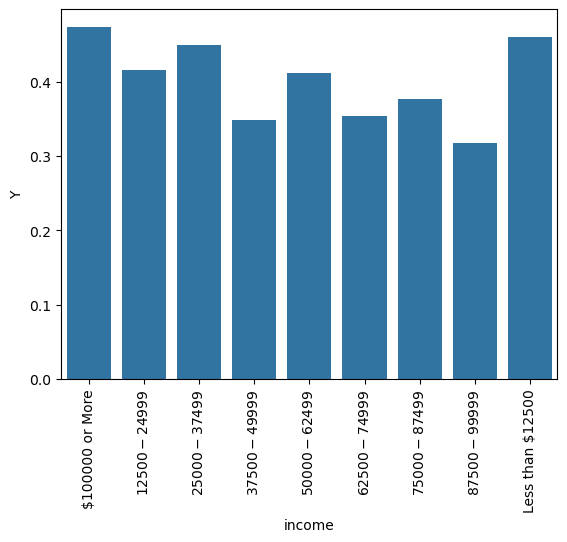

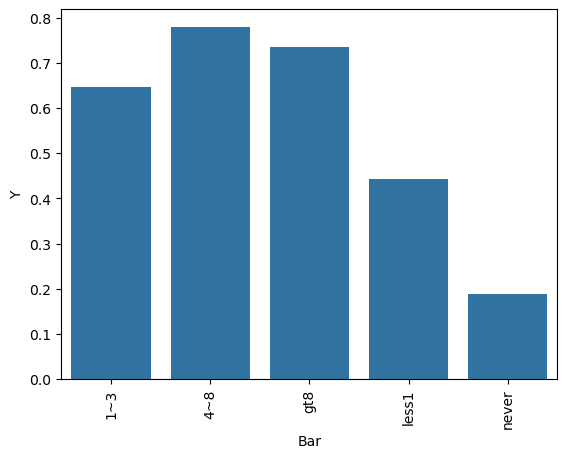

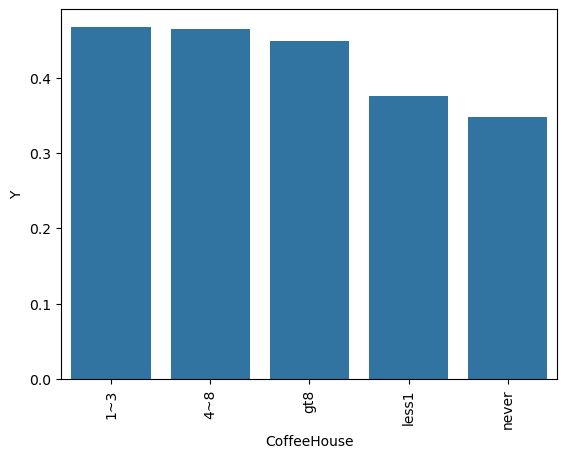

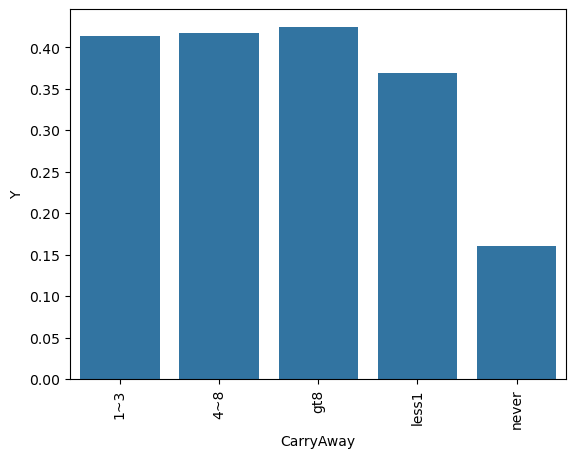

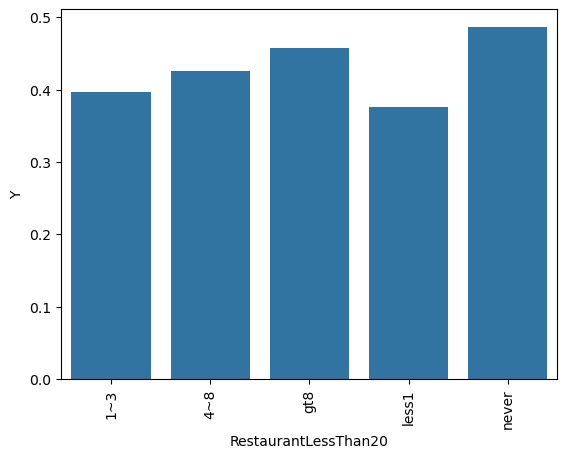

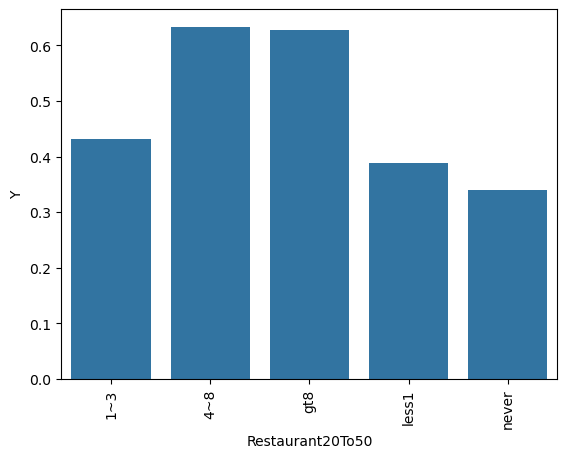

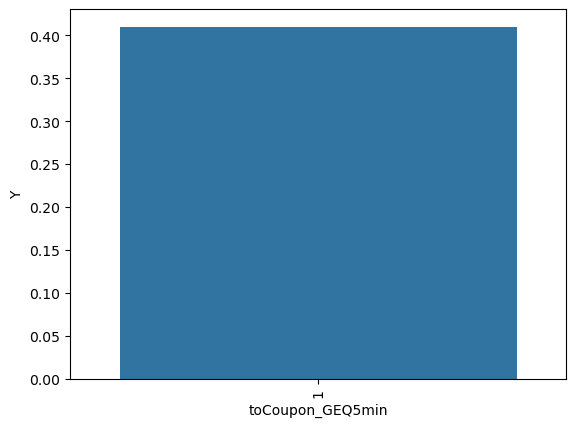

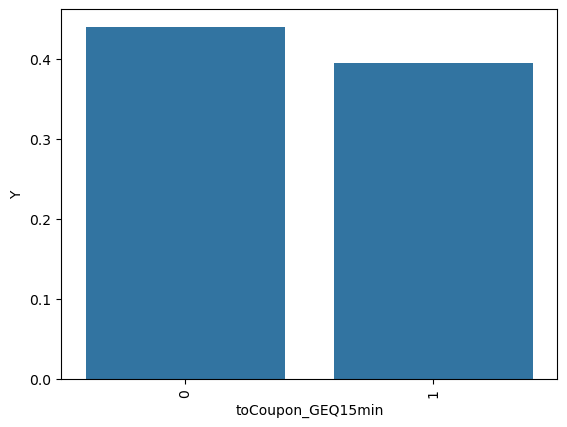

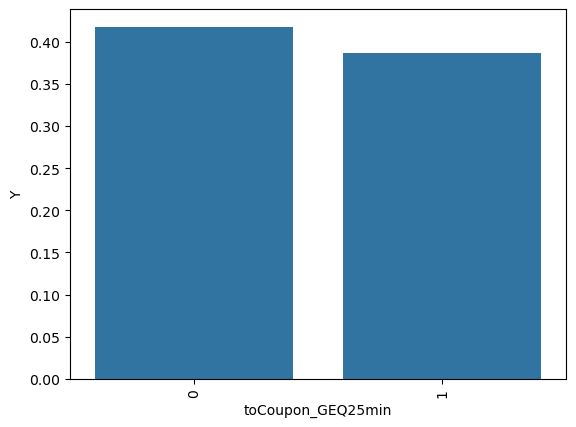

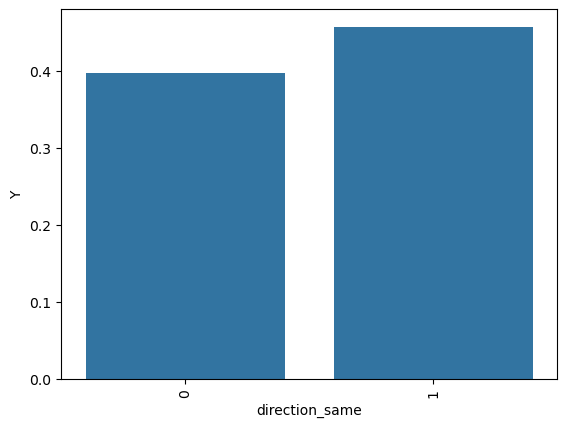

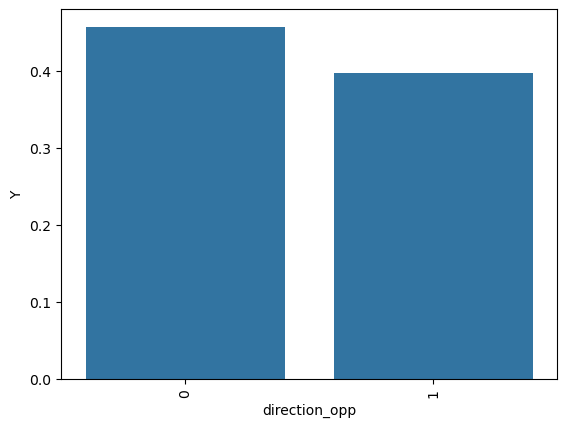

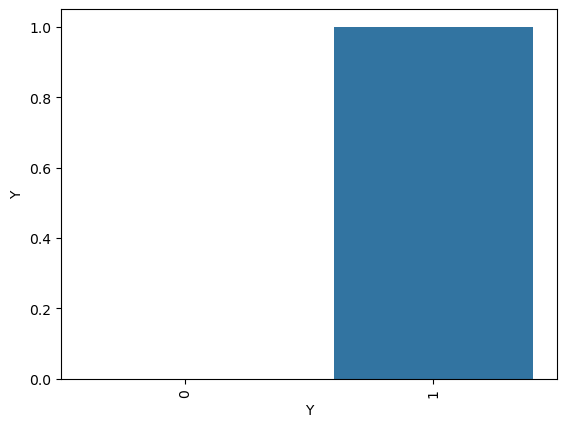

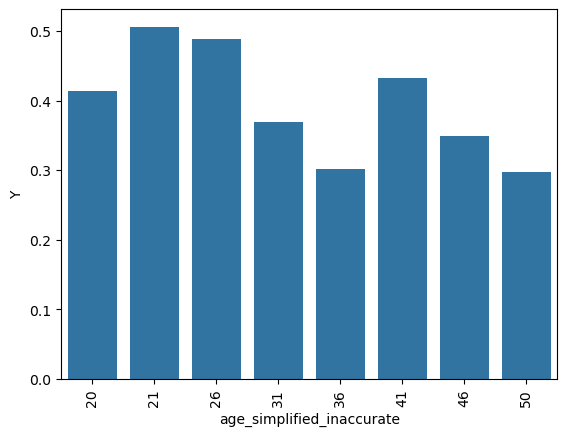

In [48]:
for column in data_justBarCoupons:
    plt.clf()
    plt.xticks(rotation=90)
    sns.barplot(data_justBarCoupons.groupby([column])["Y"].sum()/data_justBarCoupons.groupby([column])["Y"].count())
    plt.show()

In [49]:
# heading home
# driving with friends
# sunny weather
# 55 degree temperature
# 6PM
# expires in 1 day
# male
# 21 years old (are people lying about their ages?)
# single
# has no kids
# highest education level is some highschool (uh, I'm not sure these are necessarily all highschool dropouts...)
# in the architecture & engineering or production occupations
# make $100,000 or more annually
# go to the bar 4-8 times a month
# go to coffee houses 1-3 times a month
# get takeout 8+ times a month
# never go to cheap restaurants
# go to expensive restaurants 4-8 times a month
# heading in the same direction as the coupon venue
# not heading in the opposite direction

# Follow-up question:
# Are the highschool dropouts and 21-year-olds the same group as the high-earners here?
# Is there potentially underage drinking going on?

...just coffee coupons.

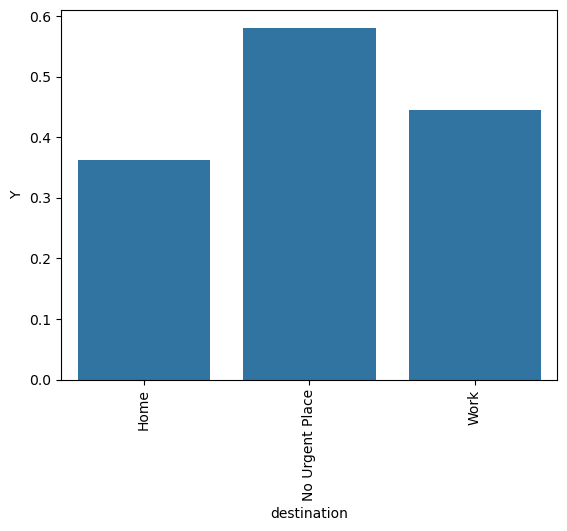

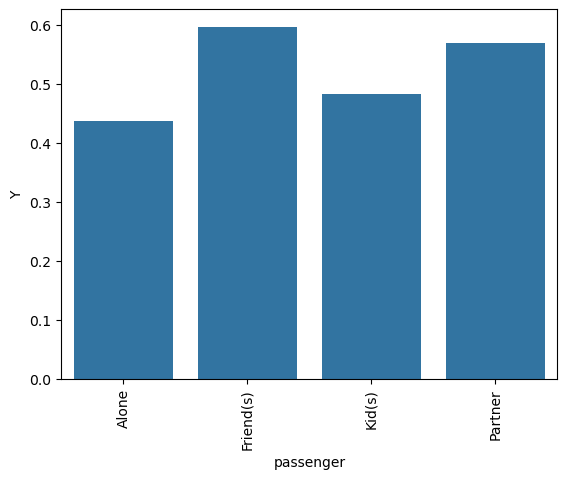

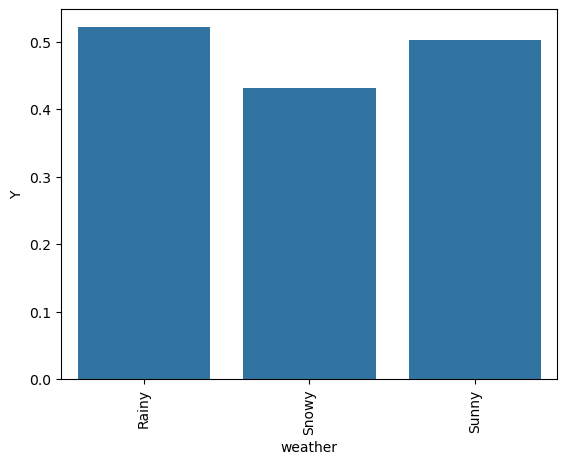

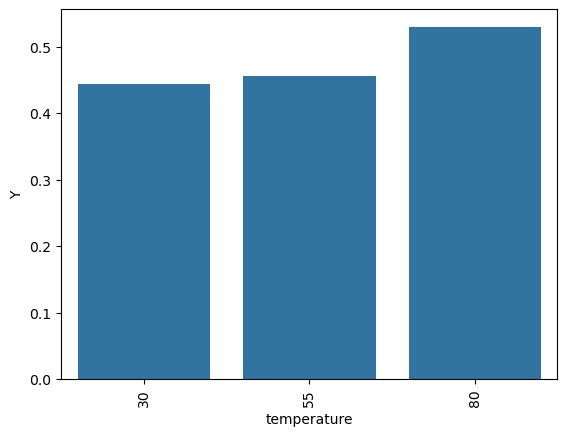

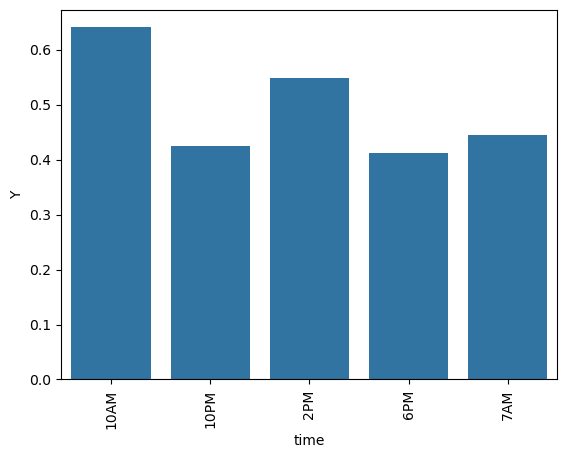

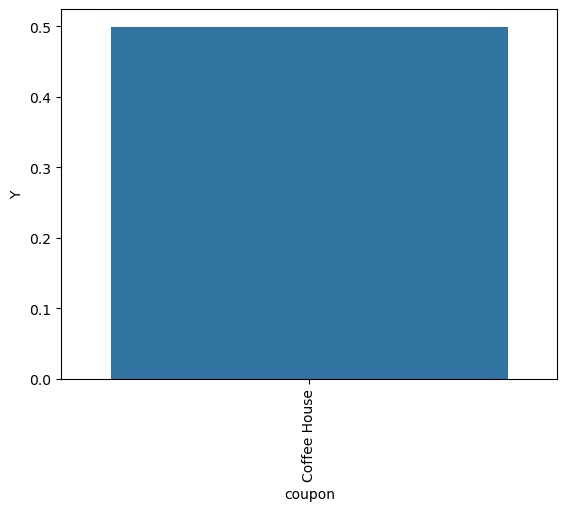

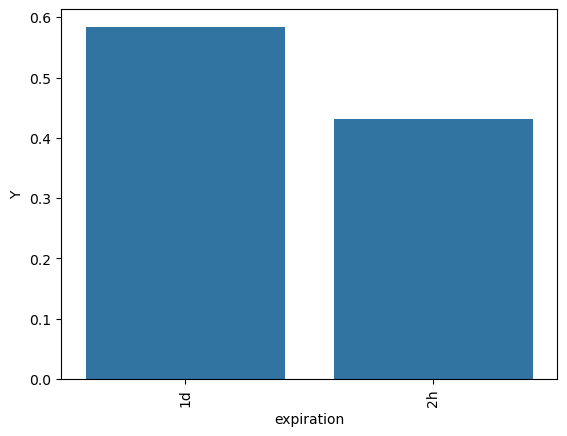

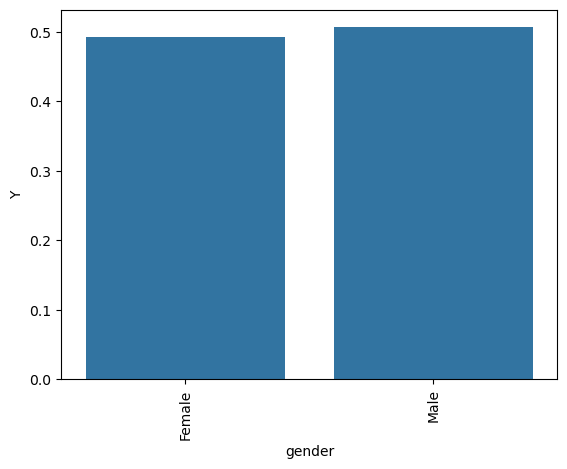

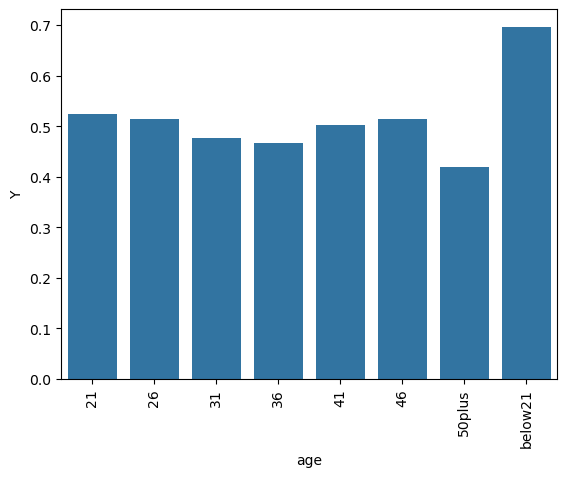

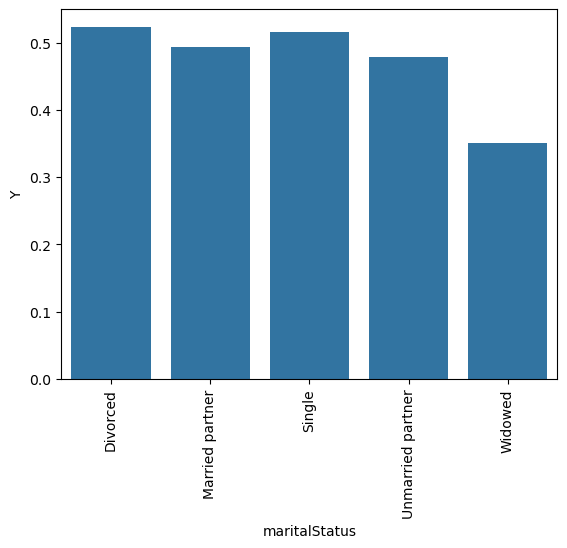

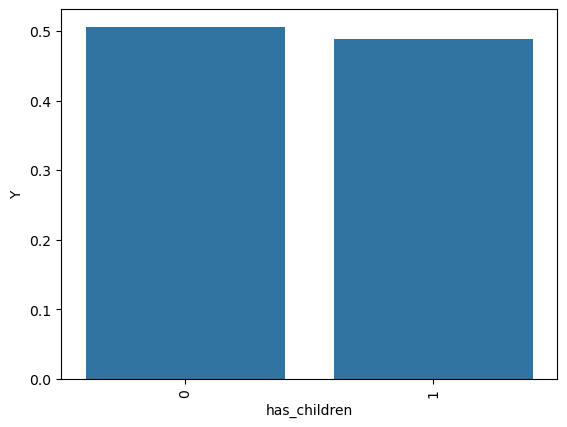

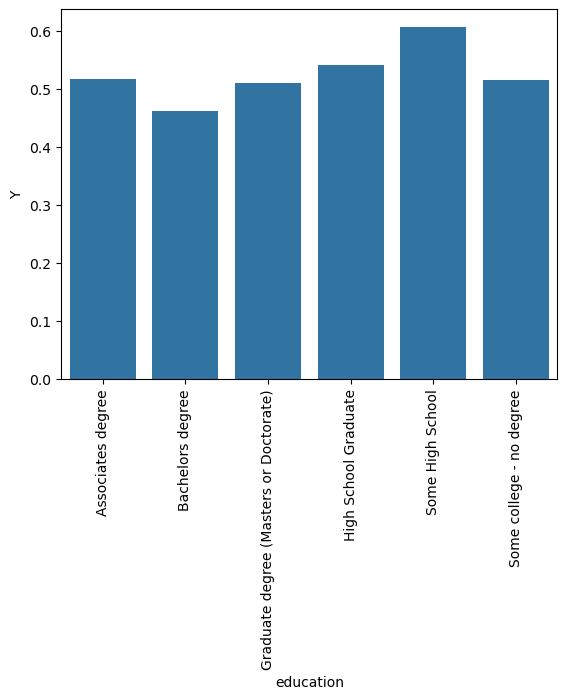

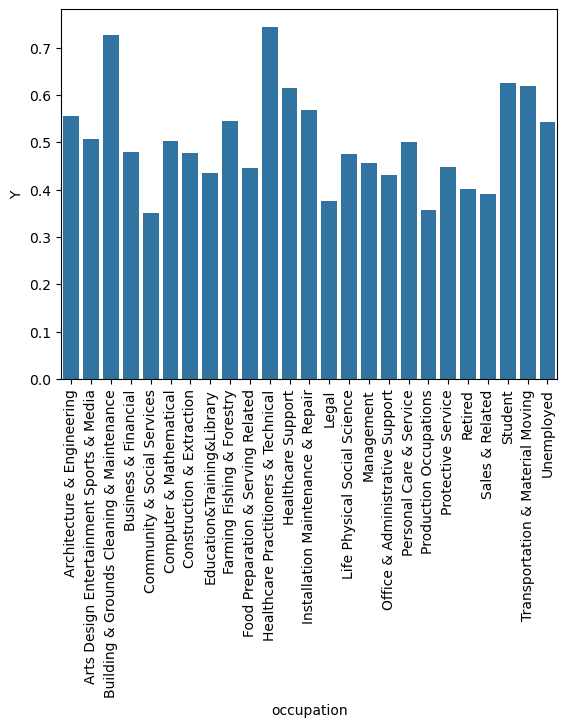

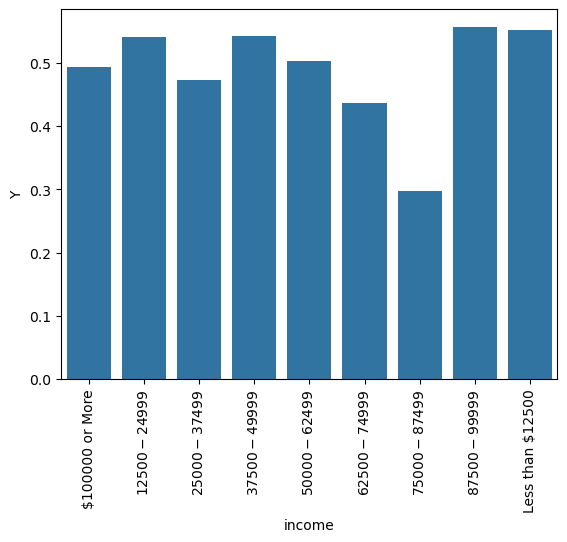

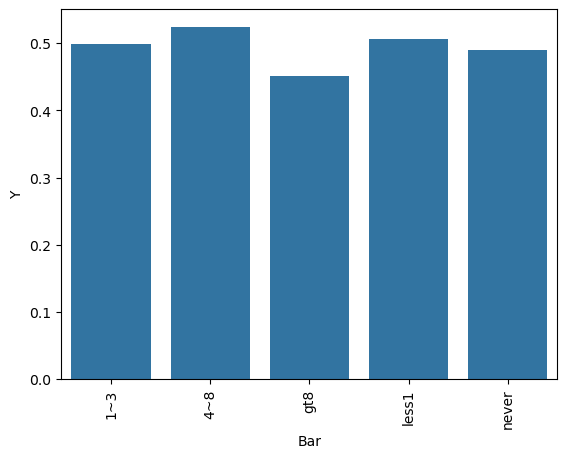

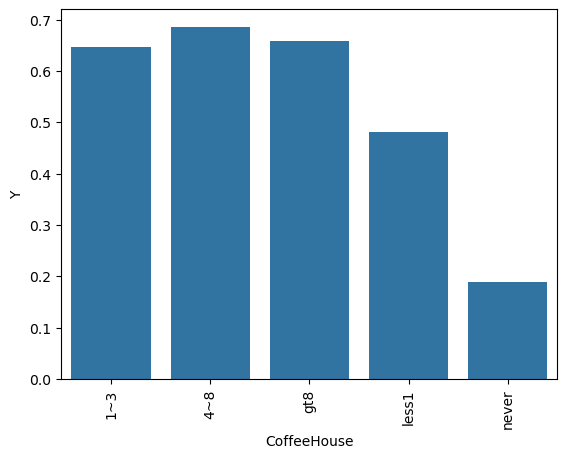

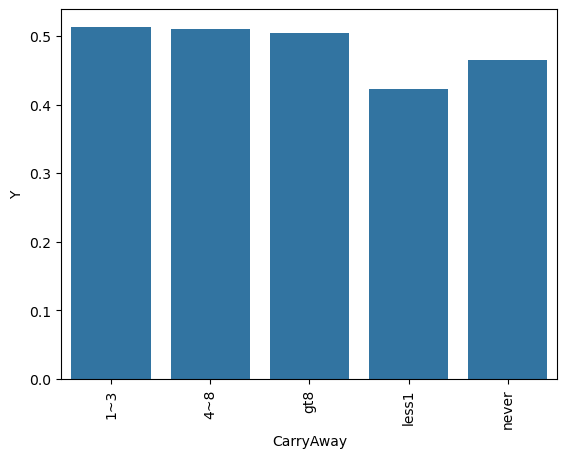

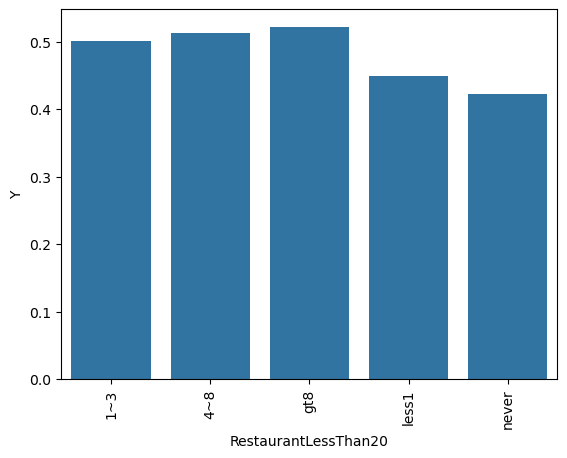

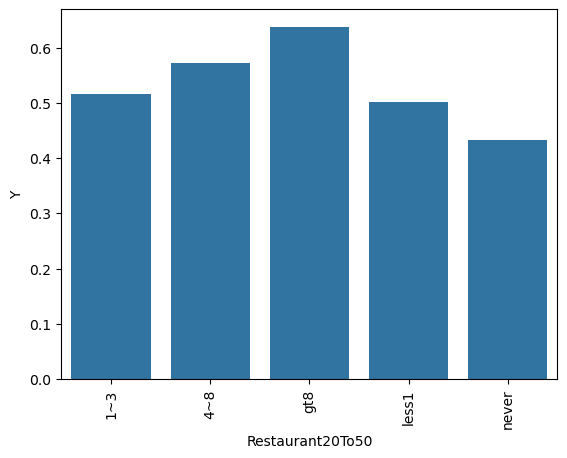

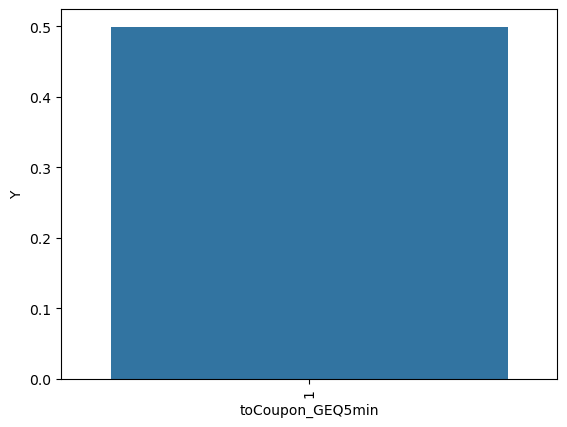

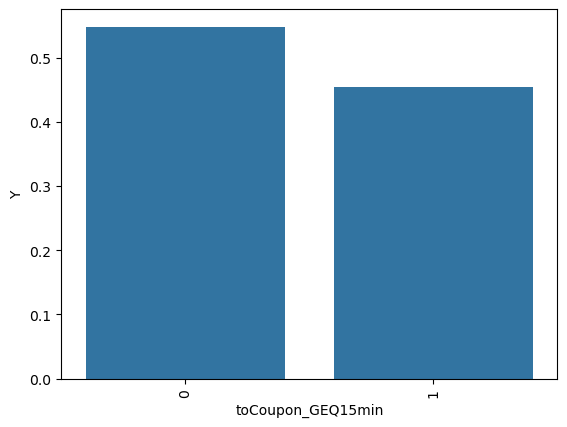

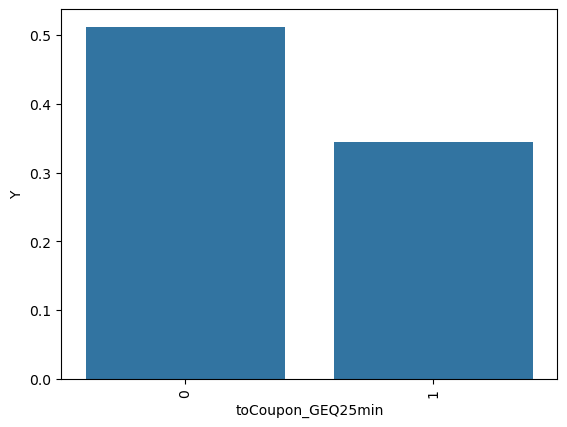

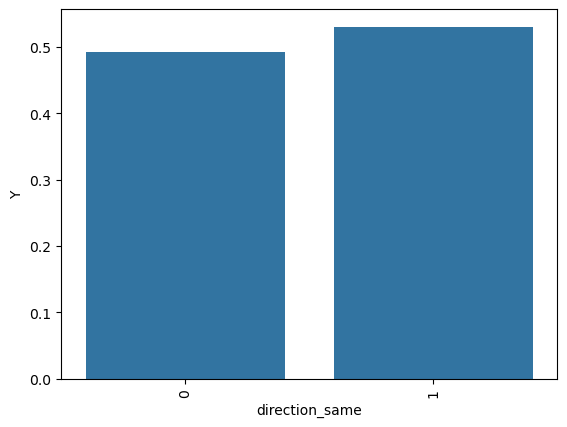

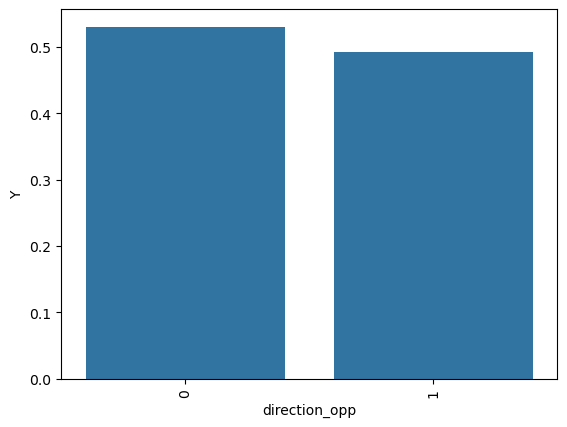

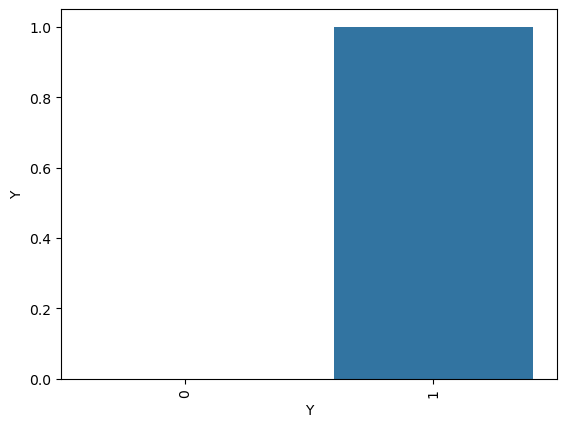

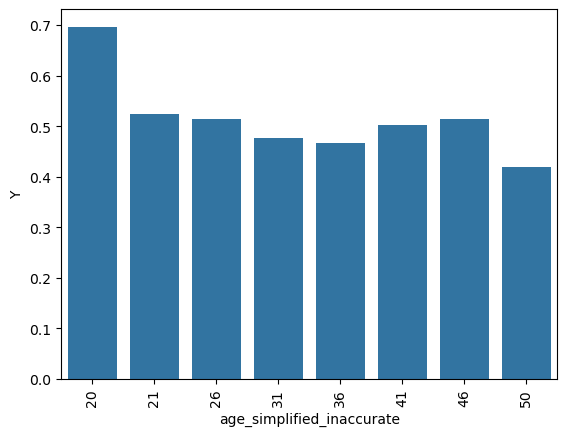

In [50]:
data_justCoffeeCoupons = data[data["coupon"] == "Coffee House"]
for column in data_justCoffeeCoupons:
    plt.clf()
    plt.xticks(rotation=90)
    sns.barplot(data_justCoffeeCoupons.groupby([column])["Y"].sum()/data_justCoffeeCoupons.groupby([column])["Y"].count())
    plt.show()

In [51]:
# going nowhere urgently
# driving with friends (maybe a partner) -> coffee dates?
# it's raining
# 80 degree temperatures
# 10AM
# coupon expires in 1 day
# male
# under 21 -> young people like coffee; i wonder how tea coupons would perform; well, i bet
# divorced (or single) -> look into that; that's weird
# has no children
# some high school education -> i'm guessing highschoolers
# healthcare practitioners & technical occupations, then maintenance/cleaning ppl -> long/weird hours, i bet
# $87,500-$99,999 annually -> weird income spread, check this out
# 4-8 bar visits monthly
# 4-8 coffee visits monthly
# 1-3 takeouts monthly, but anything above 1 is high
# 8+ cheap restaurant visits monthly
# going in the same direction as coupon venue
# not going in opposite direction

# Follow-up questions:
# What are the demographics like for just couples? Just couples getting coffee coupons?
# It's probably not raining while it's 80 degrees out, so what are the groups getting coffee in the rain vs when it's 80 degrees?
# Just what's the deal with divorcees and coffee??
# What are the hours that healthcare/technical workers and maintenance/cleaning workers accept coffee coupons?

...just cheaper restaurant coupons.

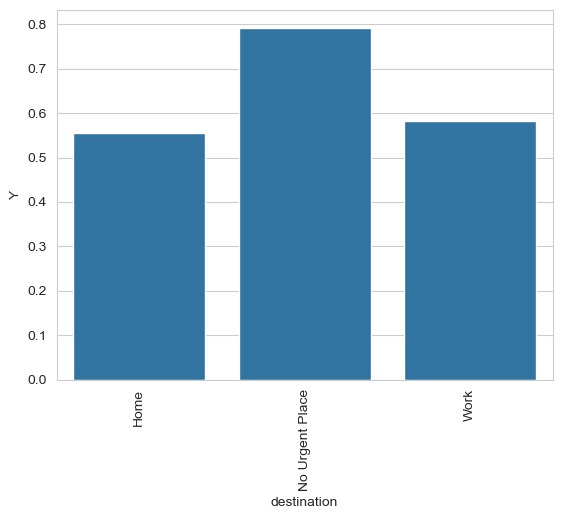

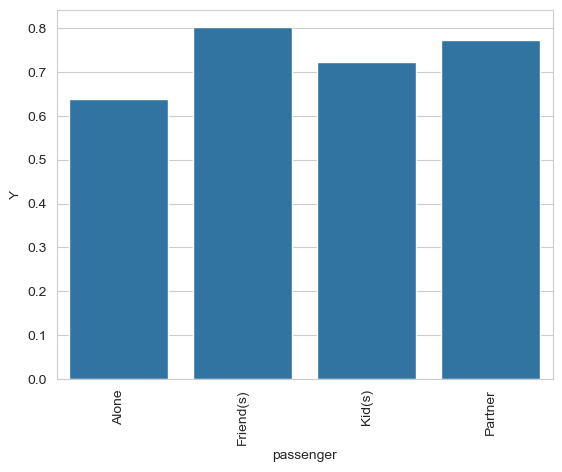

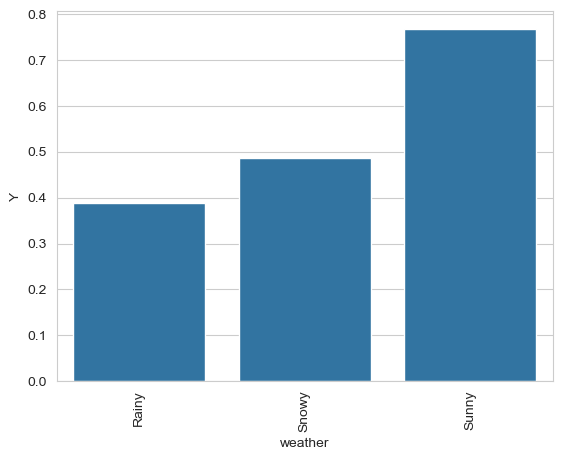

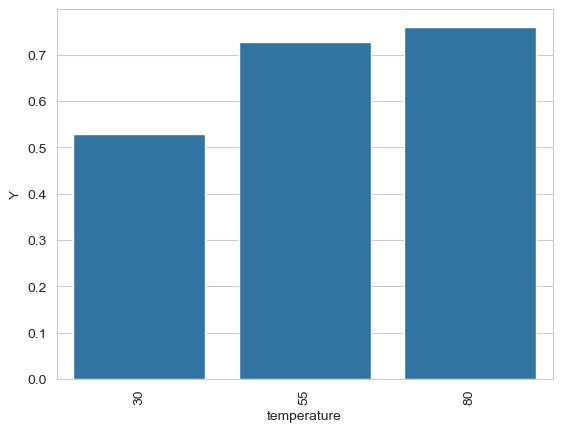

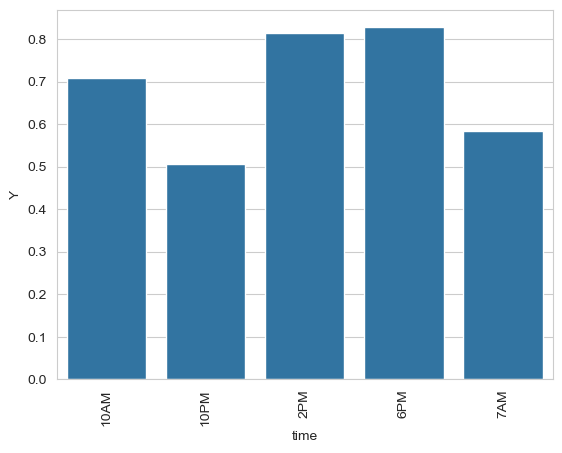

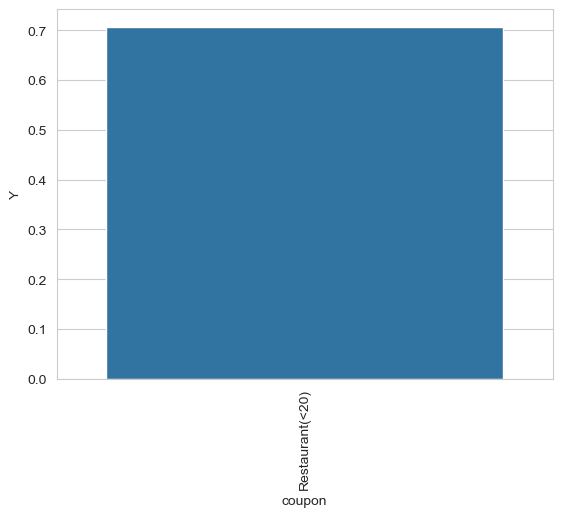

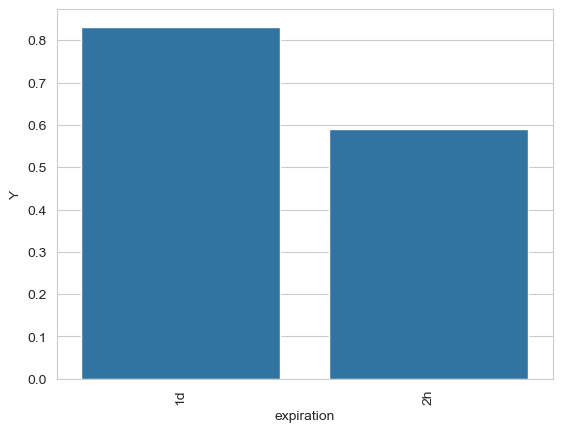

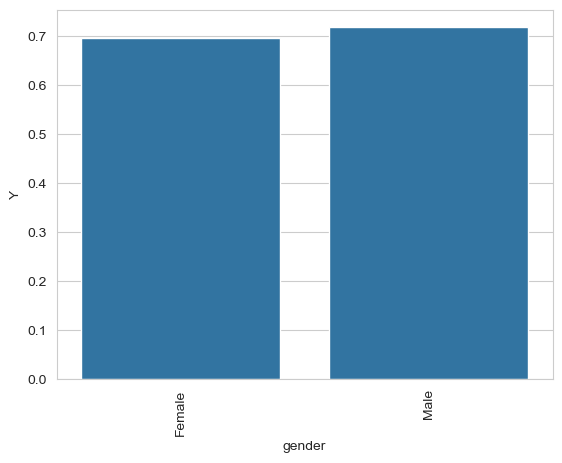

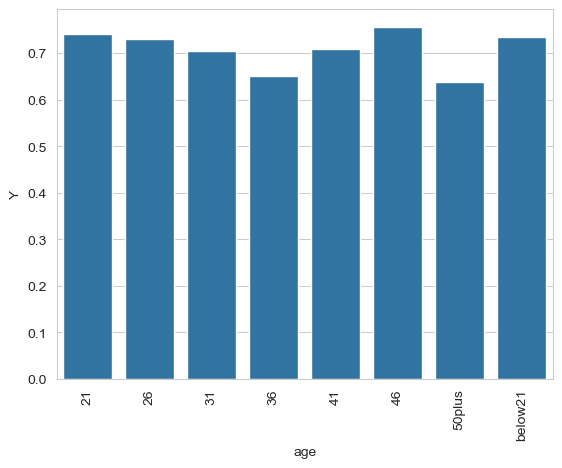

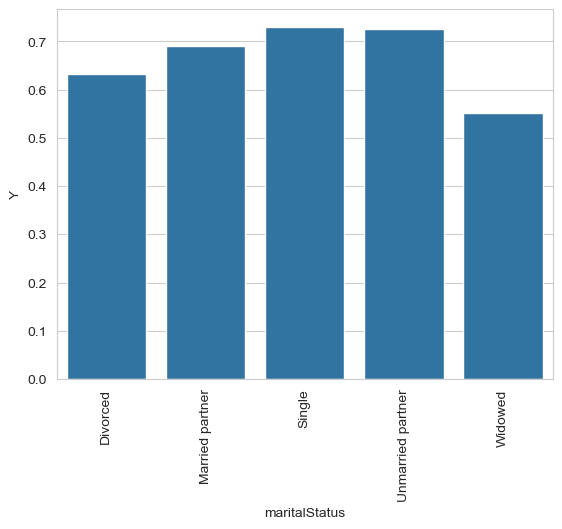

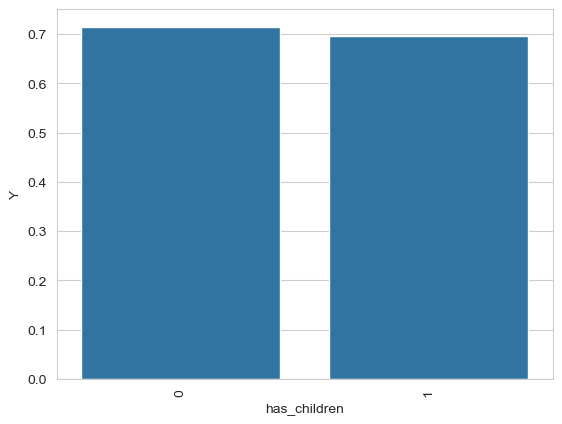

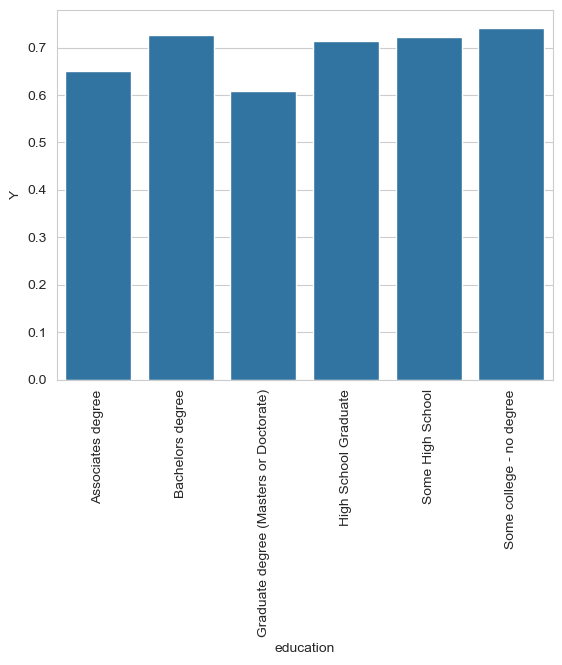

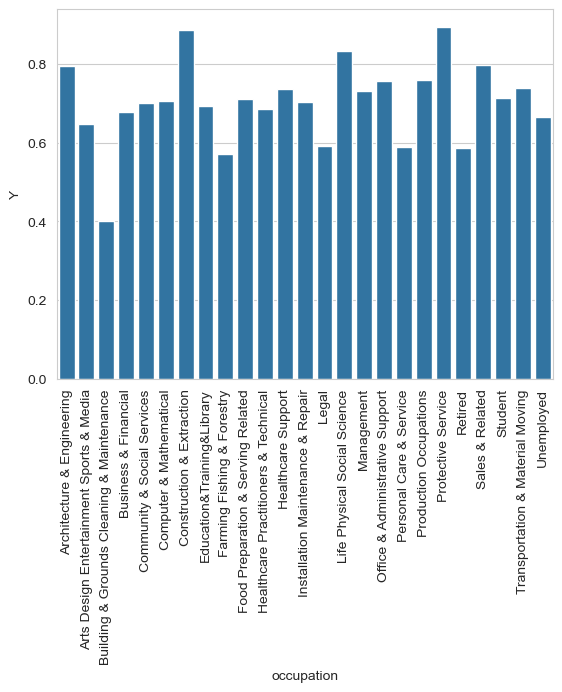

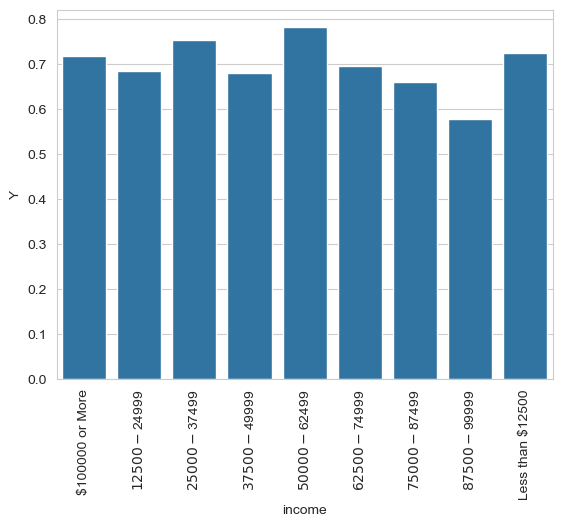

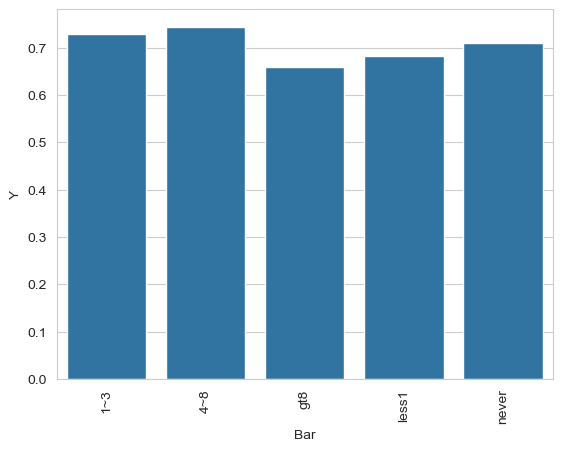

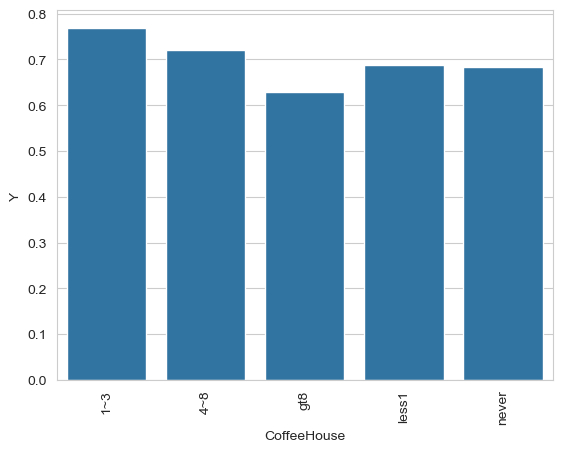

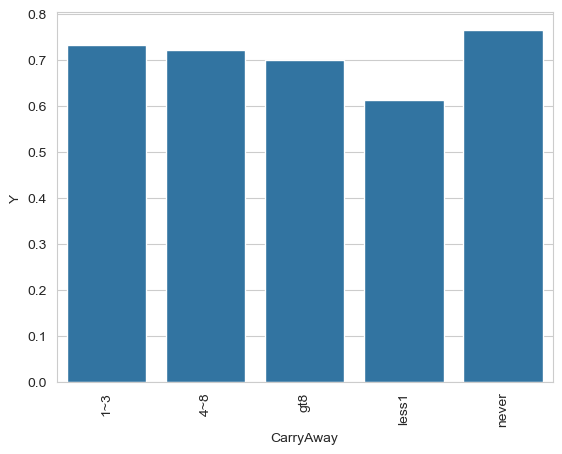

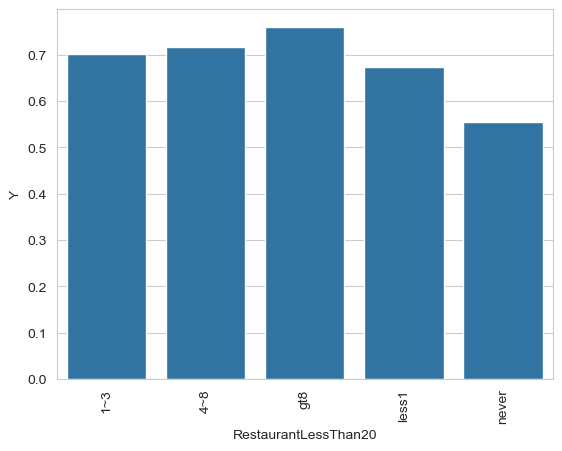

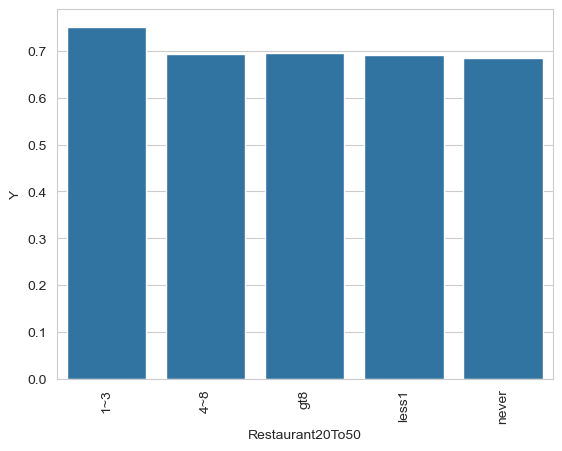

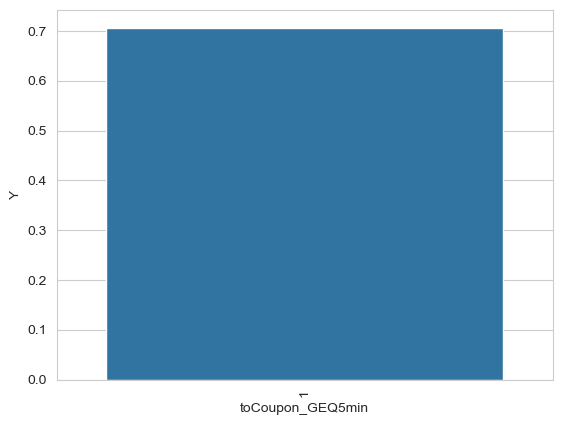

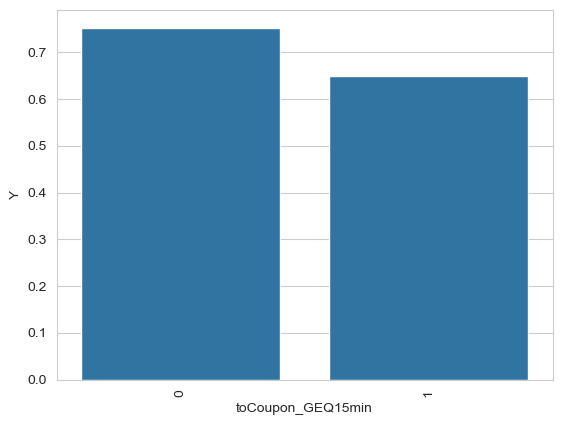

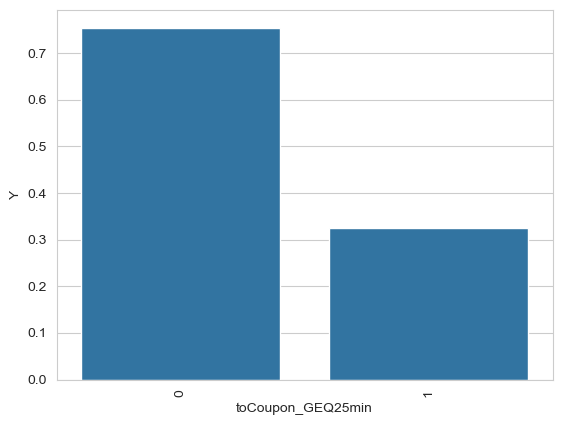

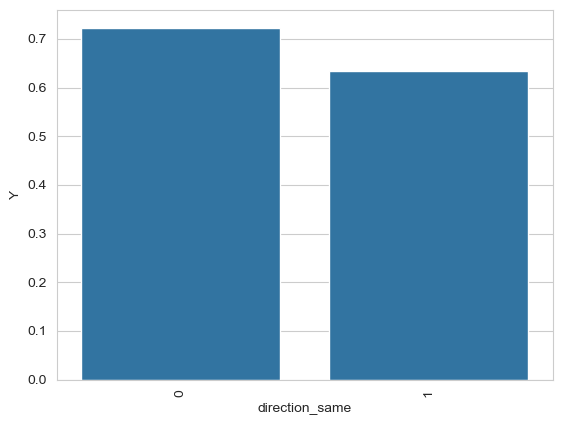

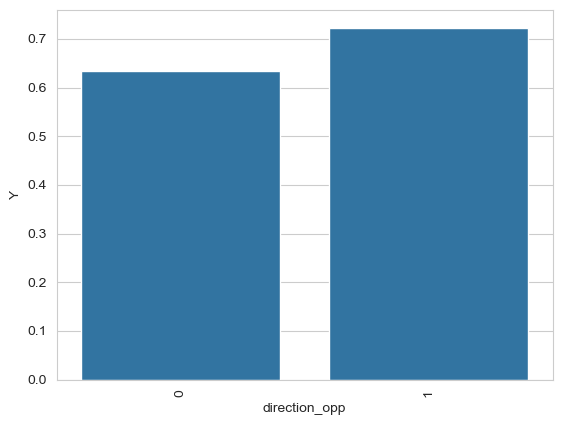

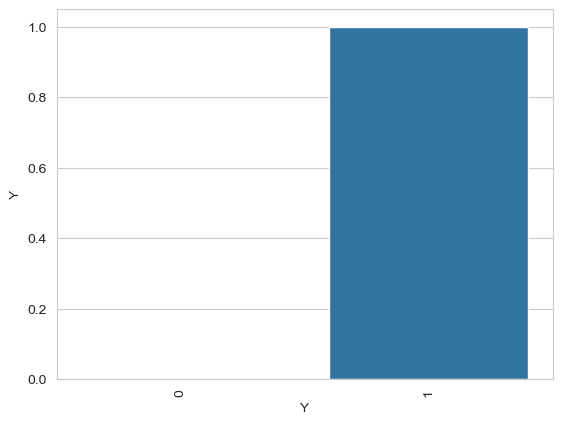

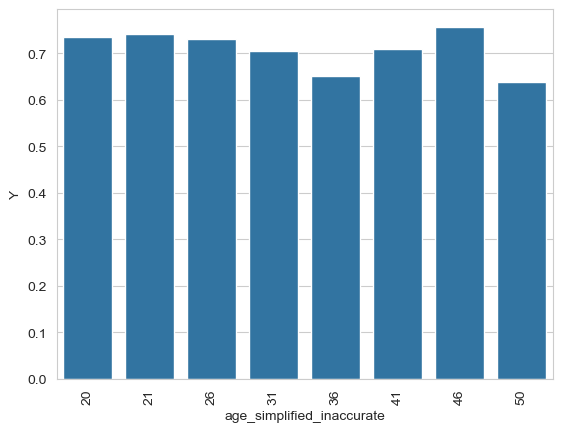

In [79]:
data_justCheapRestaurantCoupons = data[data["coupon"] == "Restaurant(<20)"]
for column in data_justExpensiveRestaurantCoupons:
    plt.clf()
    plt.xticks(rotation=90)
    sns.barplot(data_justCheapRestaurantCoupons.groupby([column])["Y"].sum()/data_justCheapRestaurantCoupons.groupby([column])["Y"].count())
    plt.show()

In [80]:
# no urgent destination
# driving with friends
# sunny weather
# 80 degrees
# 6PM followed closely by 2PM -> check out lunch vs dinner crowds
# coupon expires in 1 day
# male
# 46 years old
# single
# no kids
# some college but no degree or bachelor's degree
# protective service or construction and extraction
# $50,000 - $62,500 annually
# 4-8 bar visits per month
# 1-3 coffee house visits per month
# never gets takeout
# goes to cheap restaurants 8+ times per month
# goes to expensive restaurants 1-3 times per month
# going in the same and not opposite direction as venue

# Follow-up questions:
# This is the first time older people with more education came out with more coupon acceptances.
# The two might be correlated. Maybe I should check that.
# What is the difference between people who accept coupons at 2PM vs 6PM?

...just expensive restaurant coupons.

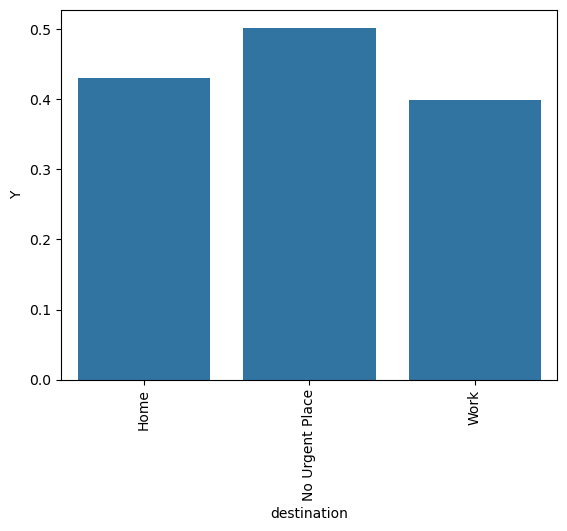

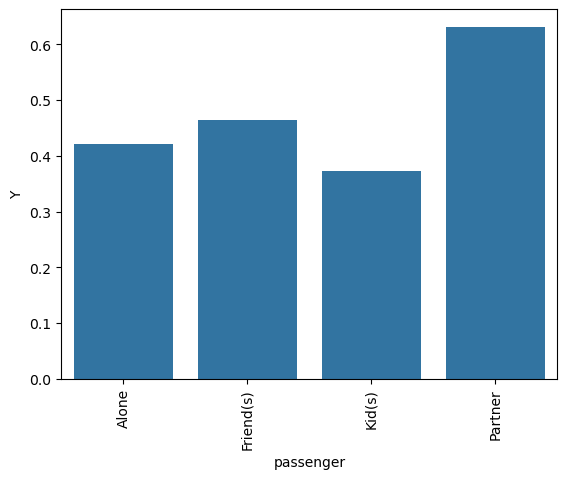

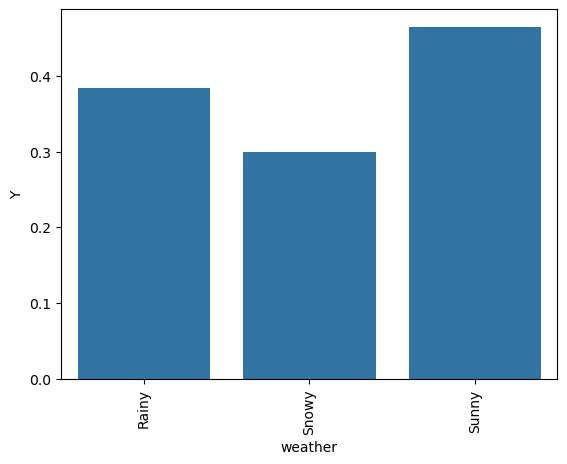

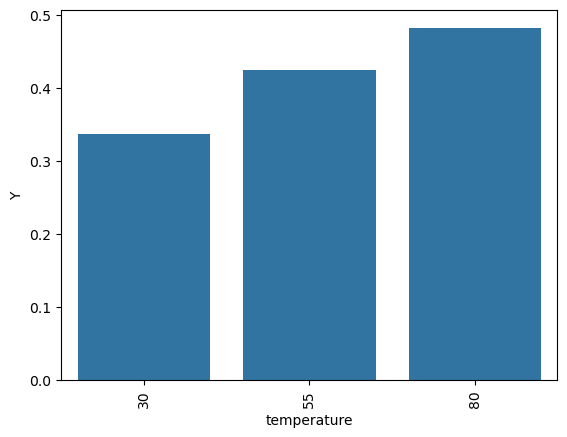

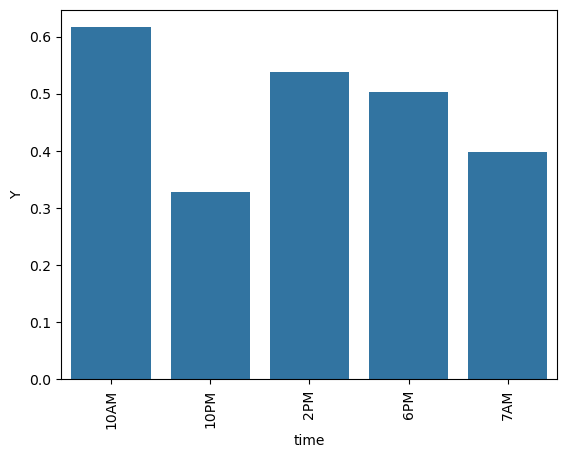

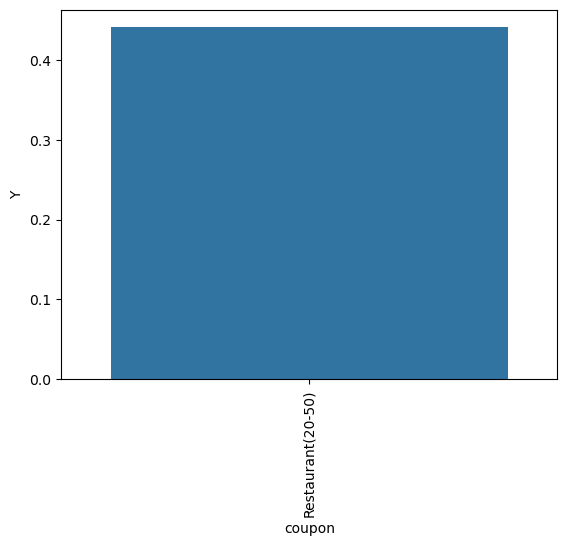

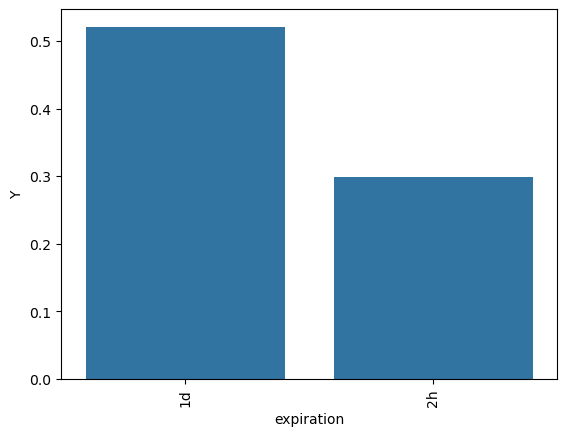

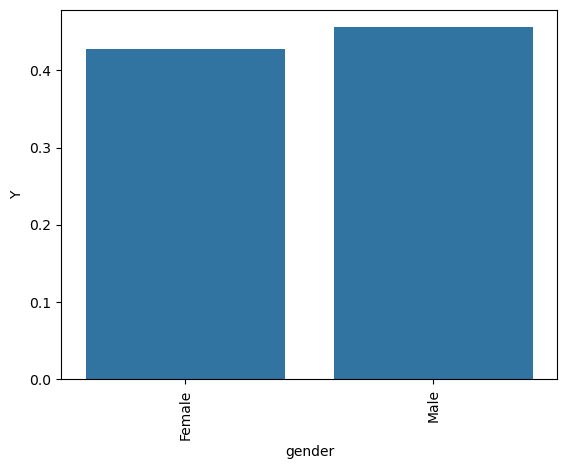

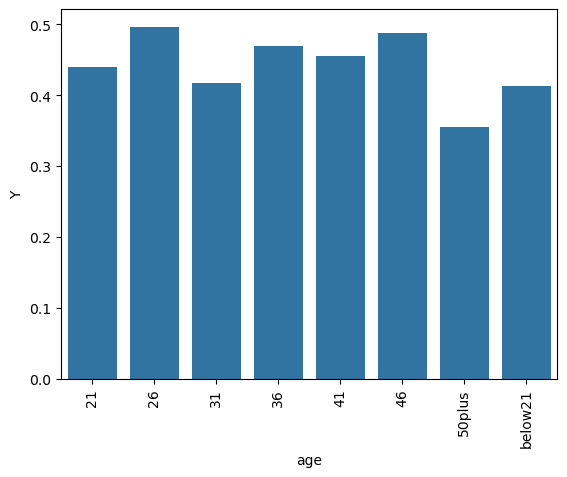

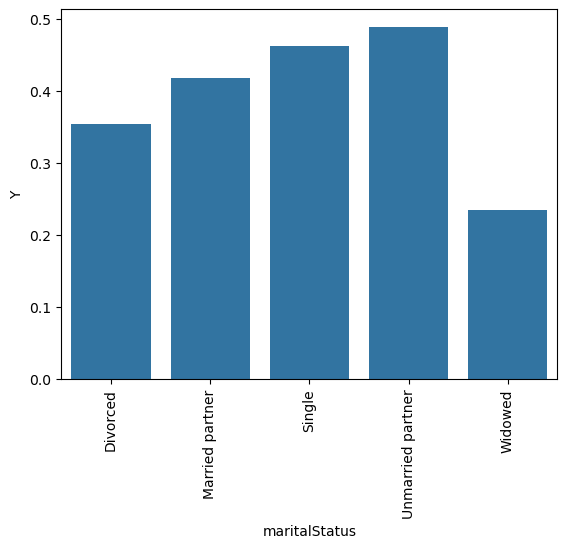

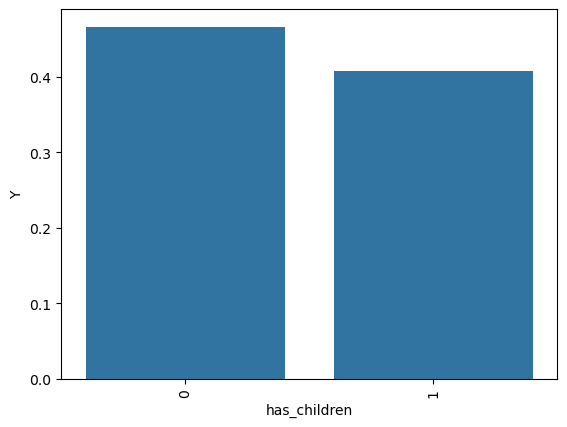

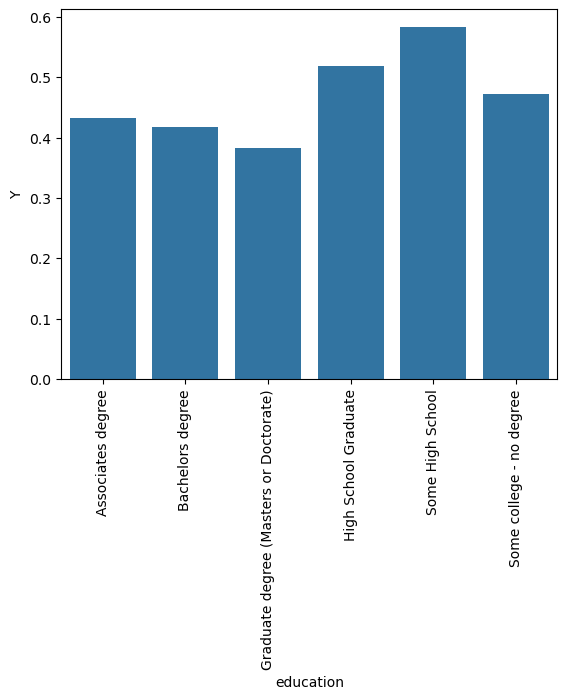

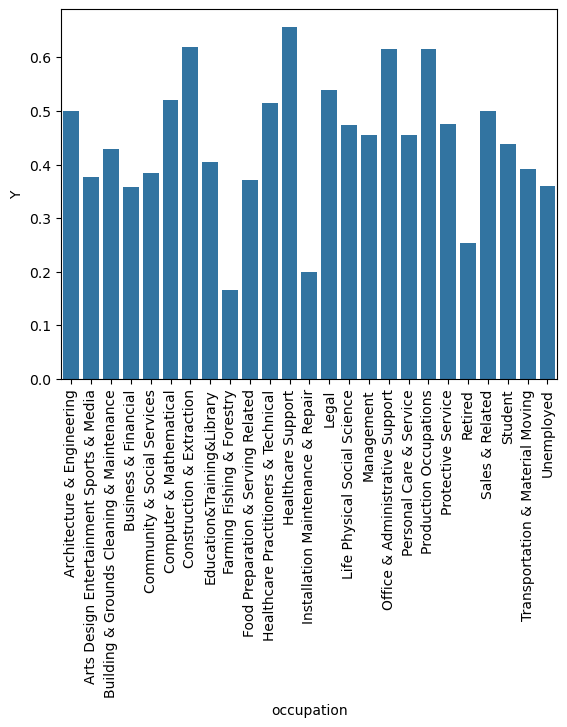

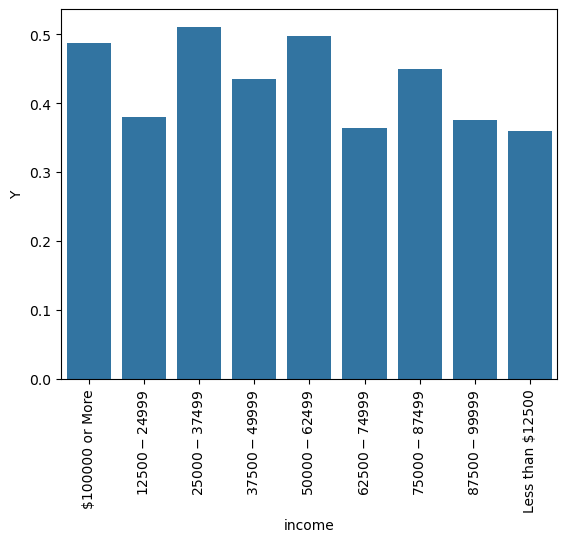

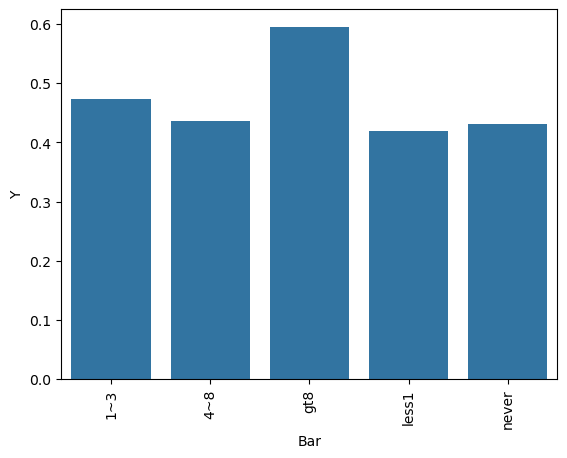

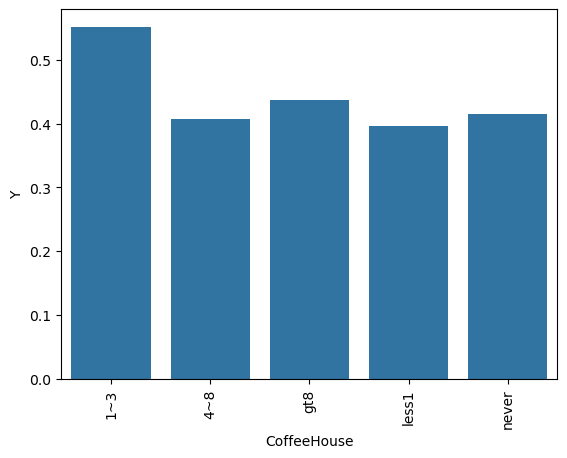

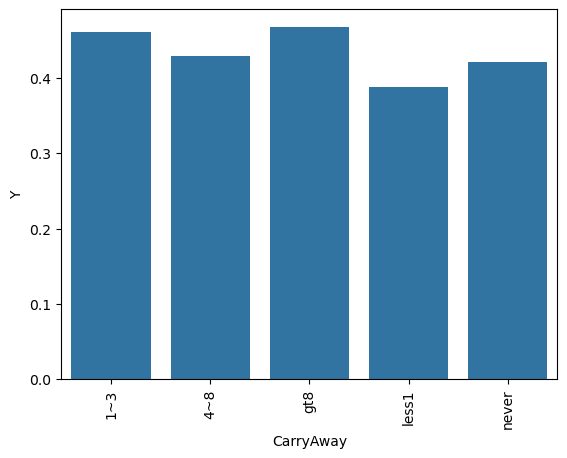

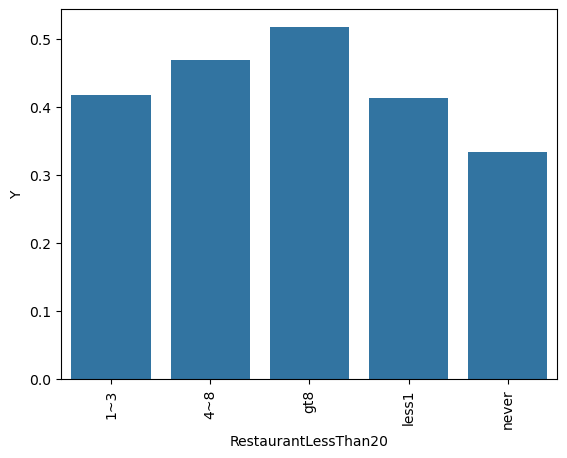

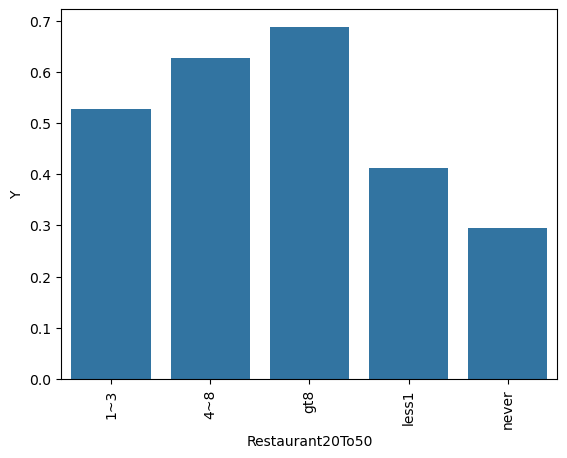

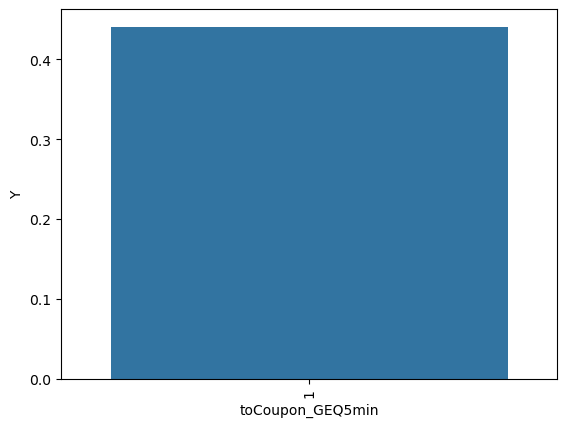

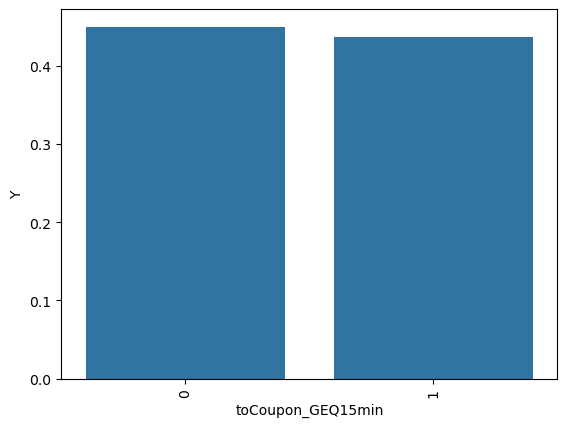

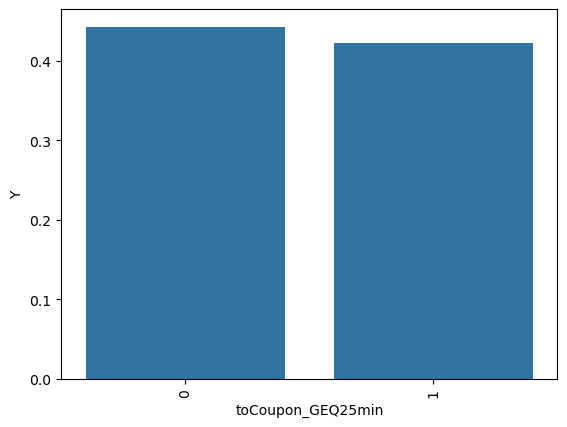

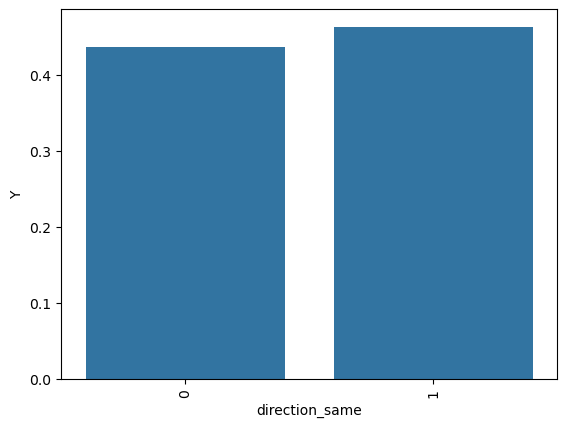

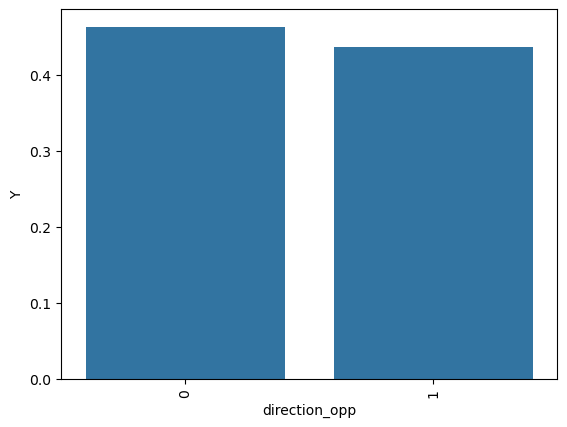

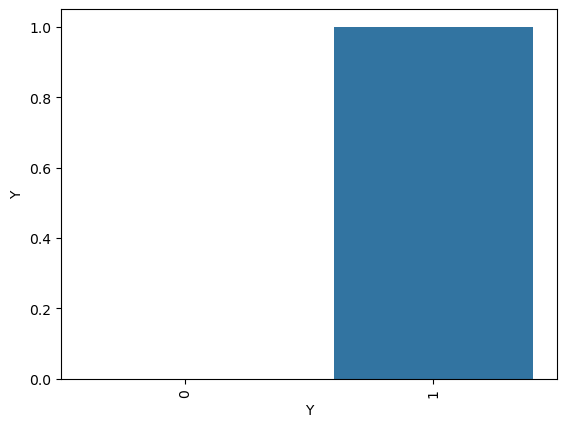

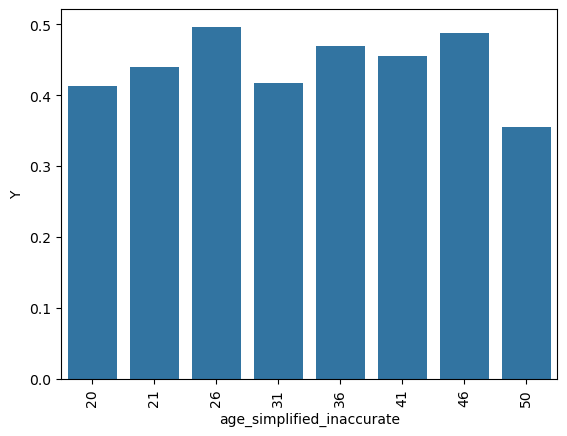

In [54]:
data_justExpensiveRestaurantCoupons = data[data["coupon"] == "Restaurant(20-50)"]
for column in data_justExpensiveRestaurantCoupons:
    plt.clf()
    plt.xticks(rotation=90)
    sns.barplot(data_justExpensiveRestaurantCoupons.groupby([column])["Y"].sum()/data_justExpensiveRestaurantCoupons.groupby([column])["Y"].count())
    plt.show()

In [55]:
# no urgent destination
# driving with partner -> absolutely for dating
# sunny
# 80 degree temperature
# 10AM -> is this the same group of people as the ones driving with their partners?
# coupon expires in 1 day
# male
# 26 or 46 years old -> this is almost certainly meant to be 26-30 and 46-49/50
# unmarried with a partner
# no kids
# some high school education
# healthcare support occupation
# $25,000-$37,499 annually
# 8+ bar visits/month
# 1-3 coffee house visits/month
# 8+ takout orders/month
# 8+ cheap restaurant visits/month
# 8+ expensive restaurant visits/month
# weak correlation, but slightly more likely to accept coupon if going toward and not away from restaurant

# Follow-up questions:
# Are the people acceptig the coupons at 10AM the same as the ones driving with their partners?
# The same as the ones that are dating but not married? Is this a date thing?
# This seems to be a group of people that go out to restaurants and bars very often. What can I do with that information?

...just takeout coupons.

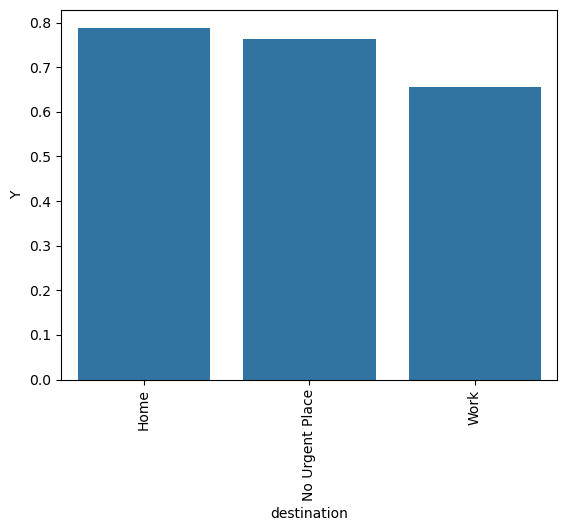

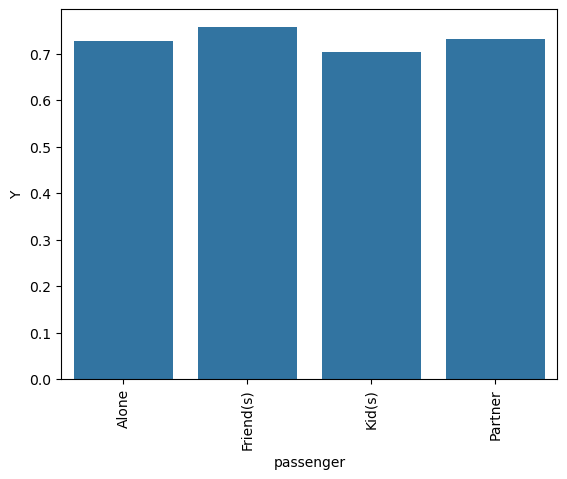

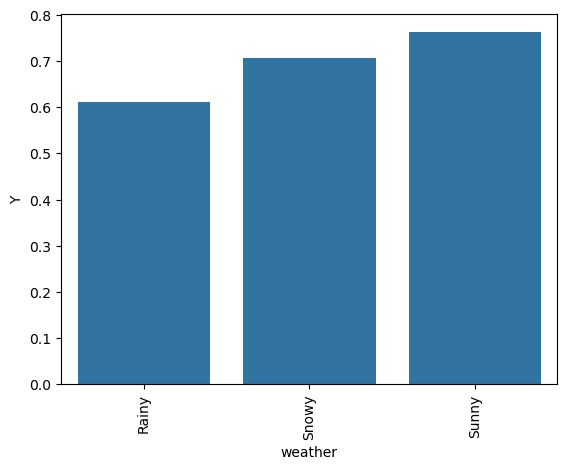

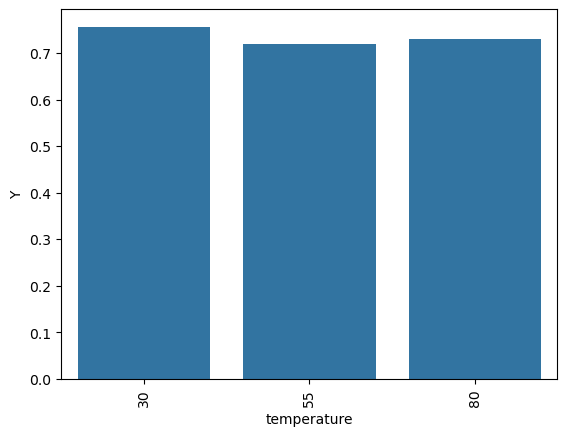

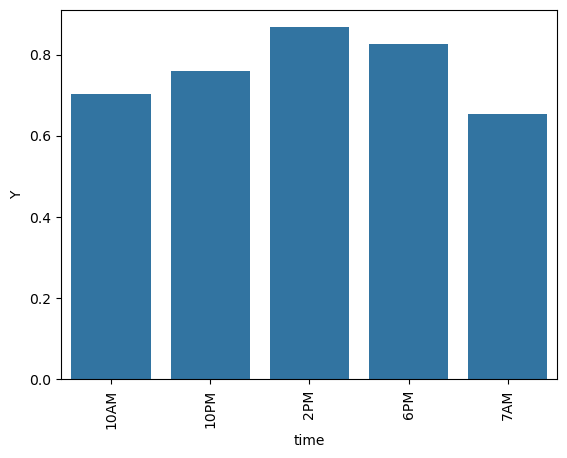

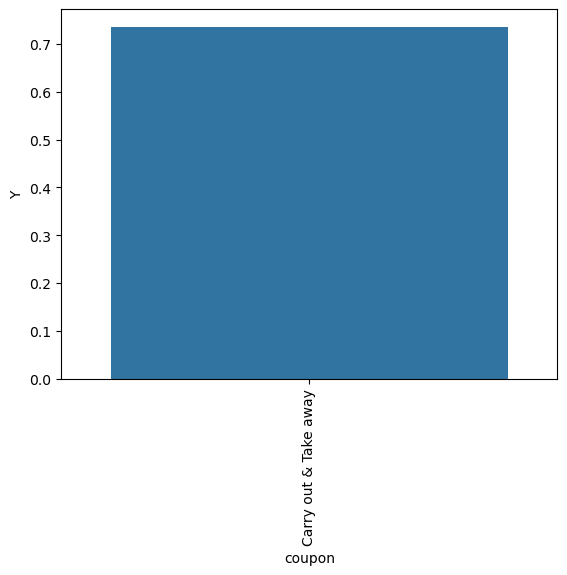

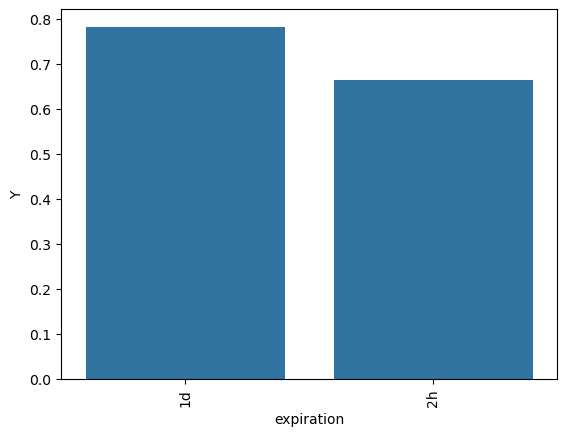

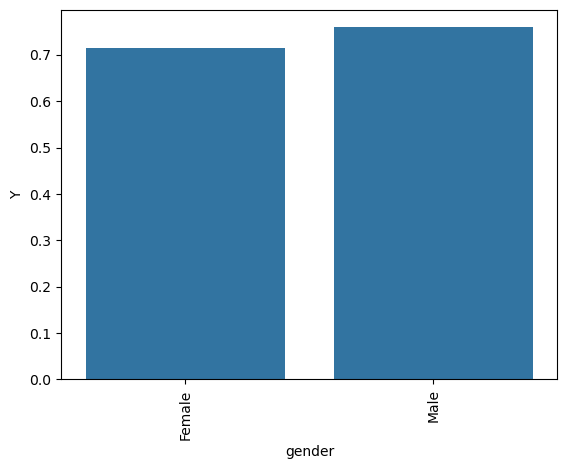

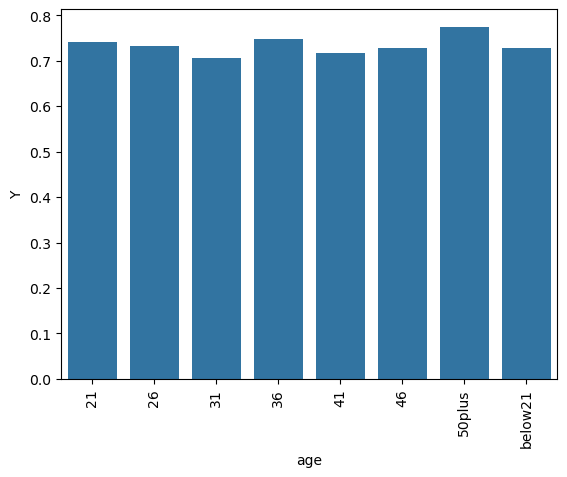

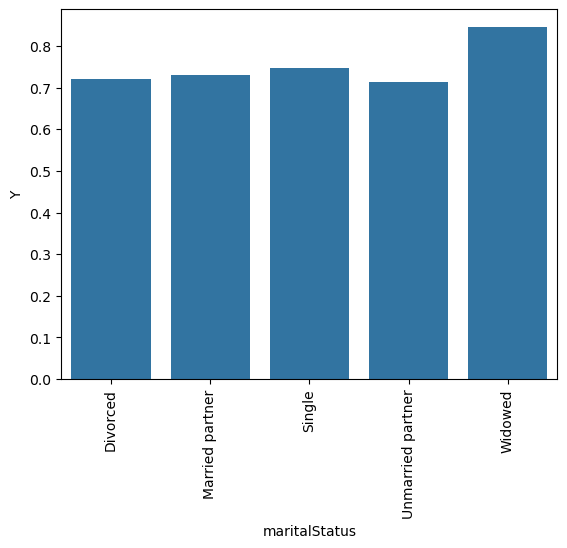

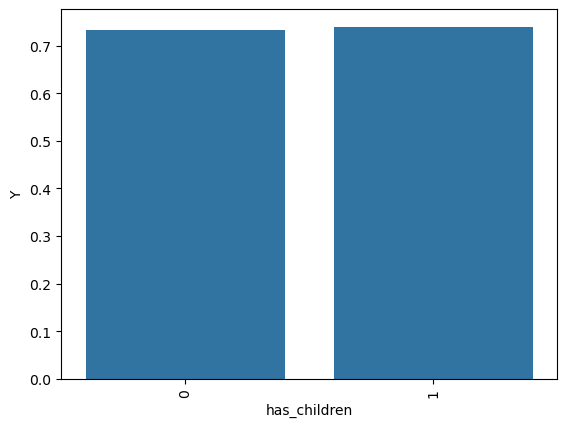

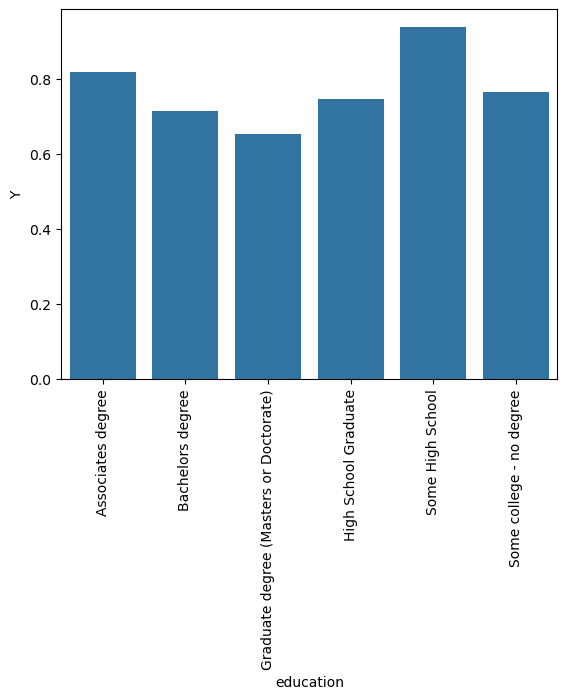

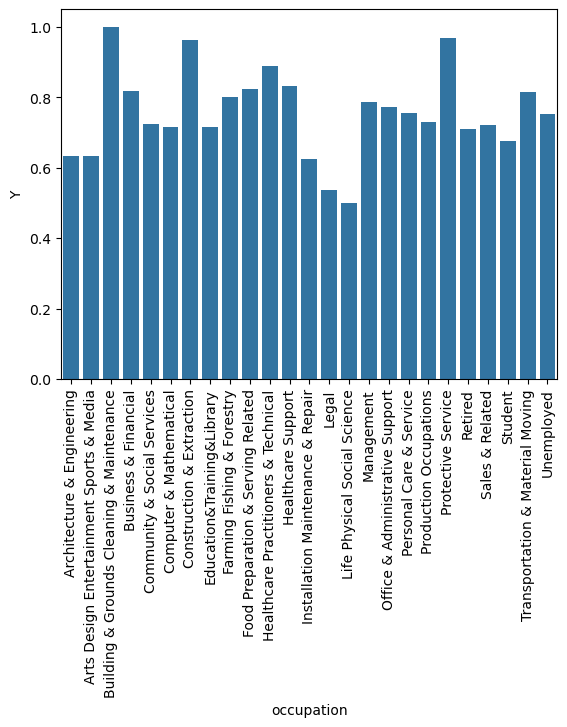

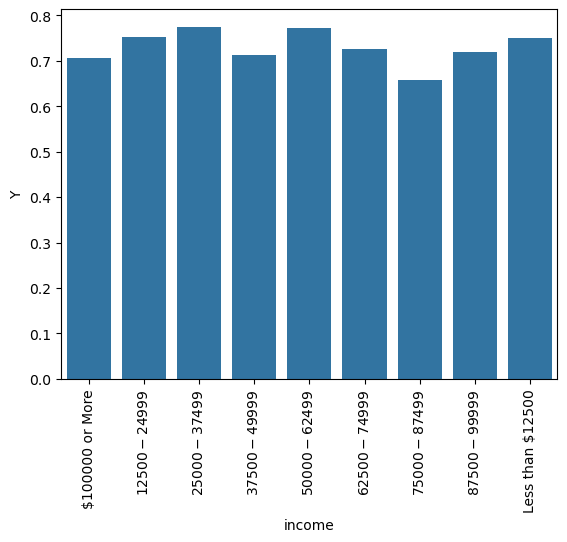

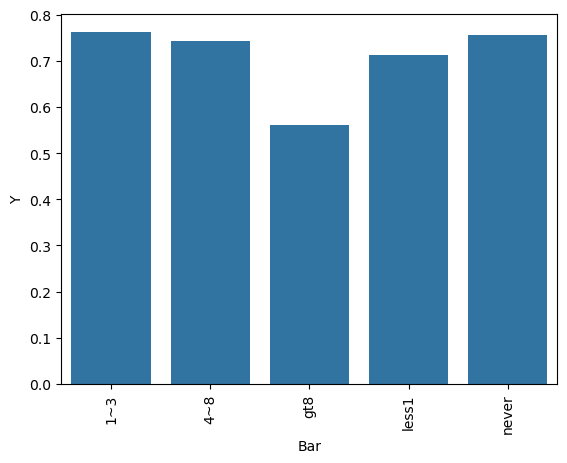

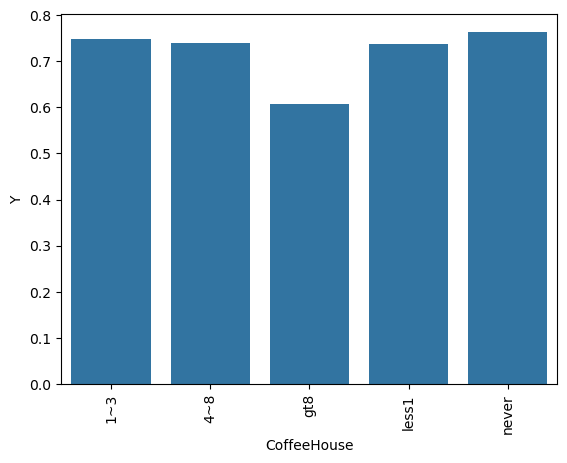

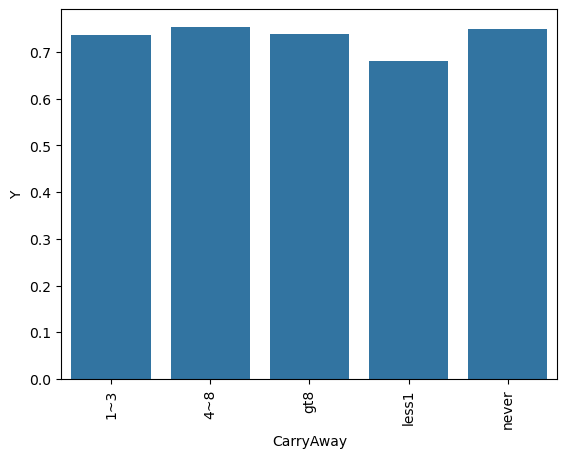

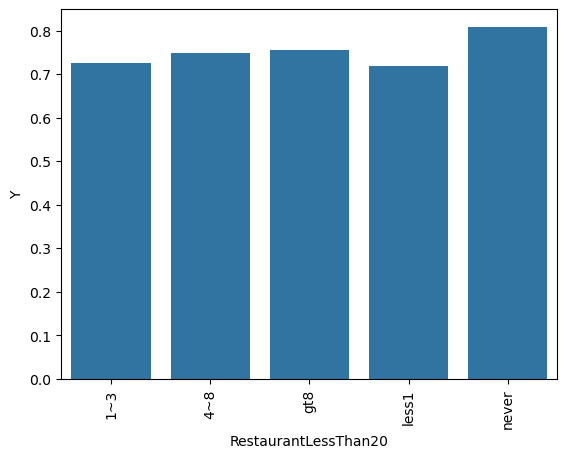

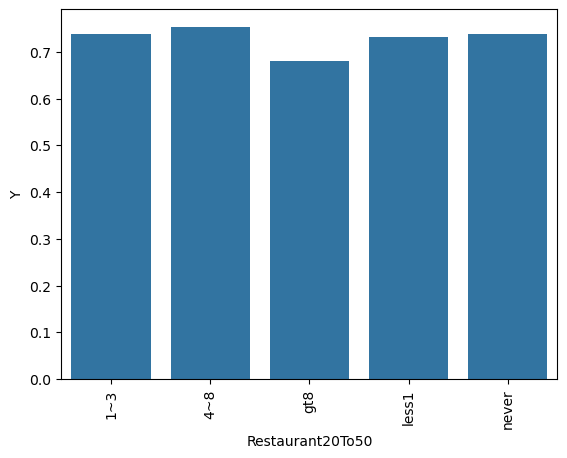

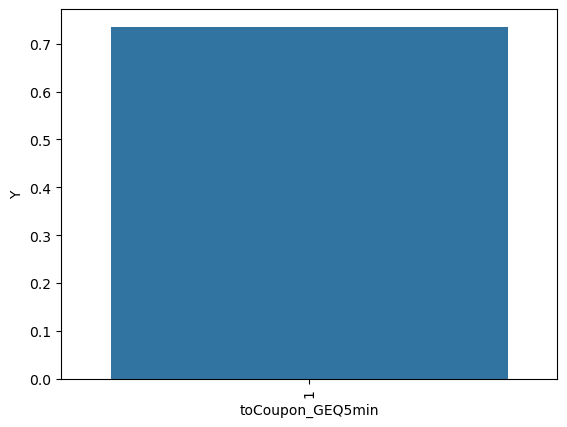

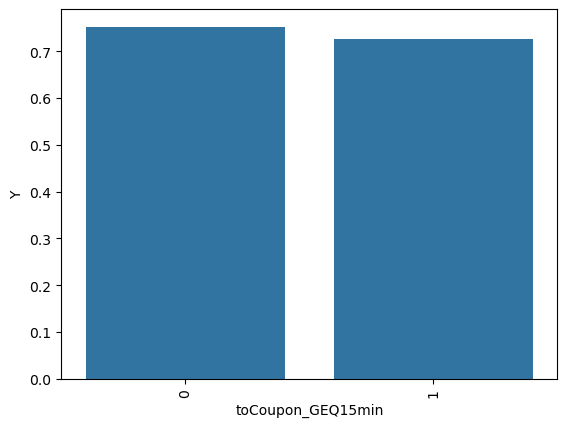

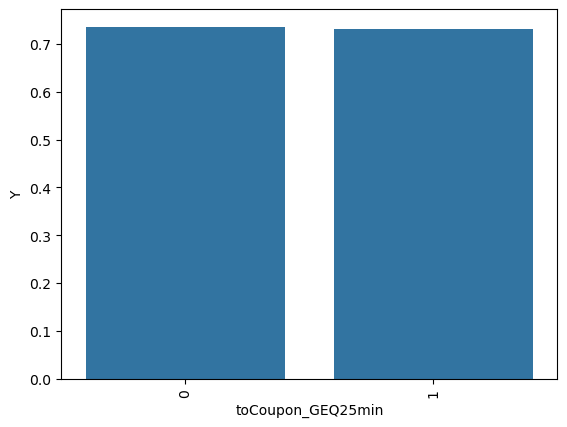

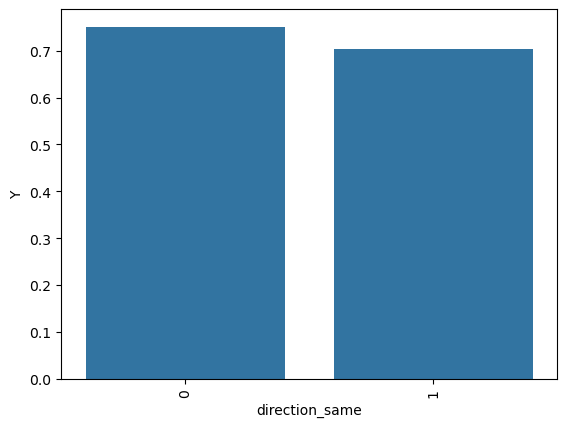

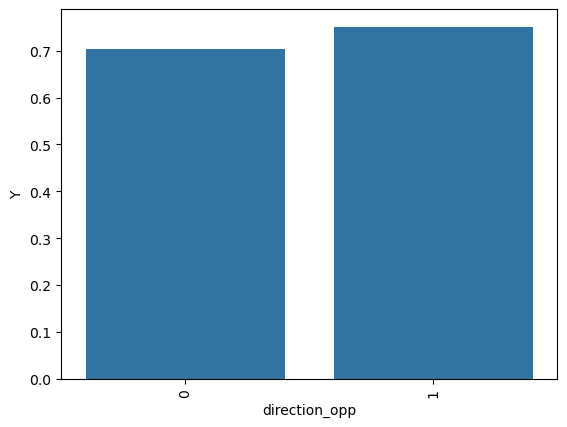

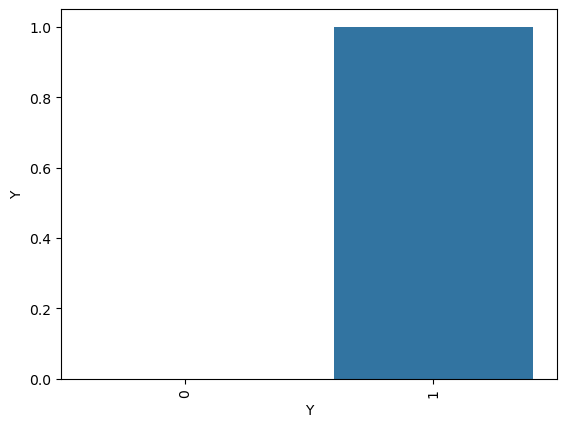

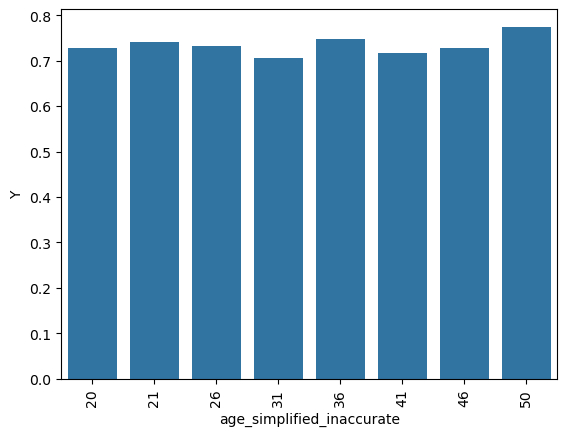

In [56]:
data_justTakeOutCoupons = data[data["coupon"] == "Carry out & Take away"]
for column in data_justTakeOutCoupons:
    plt.clf()
    plt.xticks(rotation=90)
    sns.barplot(data_justTakeOutCoupons.groupby([column])["Y"].sum()/data_justTakeOutCoupons.groupby([column])["Y"].count())
    plt.show()

In [57]:
# heading home
# driving with friends
# sunny weather
# 30 degrees out
# 2PM -> lunch orders, or just accepting coupons for later?
# expires in 1 day
# male
# 50+ -> older people (probably because travel is less convenient for them.)
# widowed -> likely an age thing
# has children -> again, if it's an age thing, the kids have probably moved out
# some high school education -> interesting. is this the same group as the older people (poorer older people, then?)
# building and grounds cleaning and maintenance professions -> again, if this is older people, we may be talking "landlord,"
#                                                           -> unemployed =/= retired, but... it's still not very high
# $25,000-$37,499 or $50,000-$62,499 annually -> i may be barking up the wrong tree, but what is average income for an older person?
# 1-3 or no bar visits monthly
# 1-3 or no coffee house visits monthly
# fairly even spread, but 4-8 or no takeout orders monthly
# no cheap restaurant visits monthly
# fairly even spread, but 4-8 expensive restaurant visits monthly
# NOT going in the same direction as restaurant -> why get takeout if you're heading there anyway?
# IS going in the opposite direction

# Follow-up questions:
# What are the demographics of the people younger than 50? Older?
# It's clear that this is a group of people that doesn't get out as much as the other sets, which makes perfect sense.
# Don't know what to do with that information, though.
# Does the group of people older than 50 with kids get out more than the ones that don't?

# Data explorations begin properly HERE.

### What coupons are healthcare workers most likely to be using?

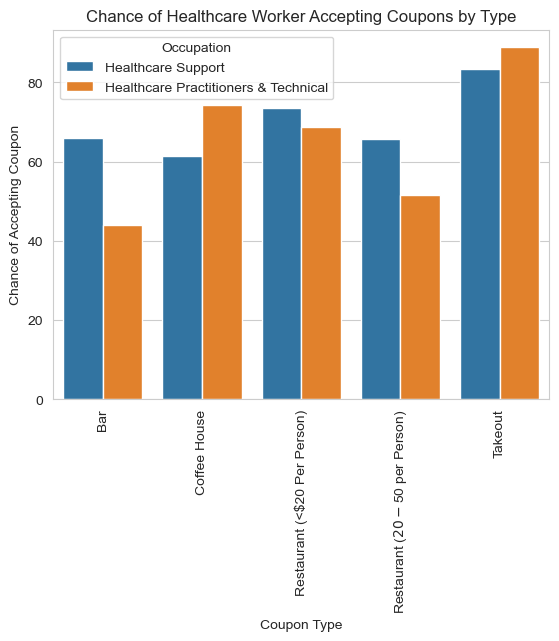

In [58]:
coupon_order = ["Bar", "Coffee House", "Restaurant(<20)", "Restaurant(20-50)", "Carry out & Take away"]
coupon_labels = ["Bar", "Coffee House", "Restaurant (<$20 Per Person)", "Restaurant ($20-$50 per Person)", "Takeout"]

healthcare_coupons = data[(data["occupation"] == "Healthcare Practitioners & Technical") | (data["occupation"] == "Healthcare Support")]
sns.set_style("whitegrid")

# I used the link below to figure out how to get the right "Y" column value.
# https://stackoverflow.com/questions/35692781/plotting-percentage-in-seaborn-bar-plot
# Estimators! Woohoo!
healthcare_plot = sns.barplot(healthcare_coupons, x="coupon", hue="occupation", y="Y", errorbar=None, order=coupon_order, estimator=lambda x: sum(x)/len(x)*100)
healthcare_plot.xaxis.set_ticks(ticks=np.arange(len(coupon_labels)), labels=coupon_labels)
plt.xticks(rotation=90)
plt.xlabel("Coupon Type")
plt.ylabel("Chance of Accepting Coupon")
plt.title("Chance of Healthcare Worker Accepting Coupons by Type")
plt.legend(title="Occupation")

From the chart above, we can see that healthcare support workers accept bar and restaurant coupons more than heqalthcare practitioners.
Healthcare practitioners accept more coupons for coffee and takeout.
Overall, both groups are most likely to accept takout coupons.
If I wanted to explore further, I might try to figure out what occupations are most similar to one another in terms of coupon acceptance,
then perhaps split them into occupation groups.

### What coupons are most popular for people under 21?

Text(0.5, 1.0, 'Chance of People Under 21 Accepting Coupons by Type')

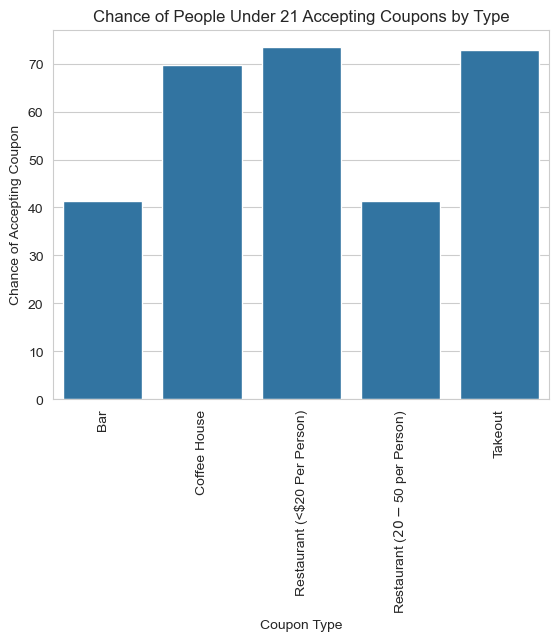

In [60]:
under21_coupons = data[data["age"] == "below21"]
under21_coupon_plot = sns.barplot(under21_coupons, x="coupon", y="Y", errorbar=None, order=coupon_order, estimator=lambda x: sum(x)/len(x)*100)
under21_coupon_plot.xaxis.set_ticks(ticks=np.arange(len(coupon_labels)), labels=coupon_labels)
plt.xticks(rotation=90)
plt.xlabel("Coupon Type")
plt.ylabel("Chance of Accepting Coupon")
plt.title("Chance of People Under 21 Accepting Coupons by Type")

It turns out people under 21 are accepting bar coupons. Did I do something wrong?
It could also be that the data comes from somewher with a lower drinking age, or that there's underage drinking, I guess?
Another possibility is that the bar coupons section includes places that also serve food.
Other than that, it seems like cheap restaurants, takeout, and coffee are more popular than expensive restaurants and bars for people under 21.
To explore further, I'd definitely like to see what's going on with the bar coupons, but I' not sure what I could learn without more data.

### Are the people with some highschool education mostly under 21 or highschool dropouts?

Text(0.5, 1.0, 'Bar Coupons for People with Some High School Education')

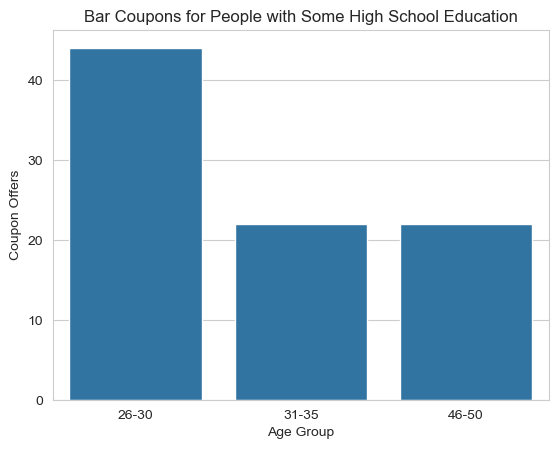

In [62]:
data_some_highschool_education = data[data["education"] == "Some High School"]
someHighSchoolEducation_age_plot = sns.countplot(data_some_highschool_education, x = "age", order=["26","31","46"])
someHighSchoolEducation_age_plot.xaxis.set_ticks(ticks=np.arange(3), labels=["26-30","31-35","46-50"])
plt.xlabel("Age Group")
plt.ylabel("Coupon Offers")
plt.title("Bar Coupons for People with Some High School Education")

Well, it looks like there are actually no people 21 and under with just some high school education. I'm gonna take a quick look.

In [81]:
under21_coupons["education"].value_counts()

education
Some college - no degree    437
High School Graduate         88
Bachelors degree             22
Name: count, dtype: int64

Looks like everybody under 21 went to college. Does that mean the "under 21" age group is strictly 18-21? Weird.

### Are the highschool dropouts and 21-year-olds the same group as the high-earners in the bar coupon group?

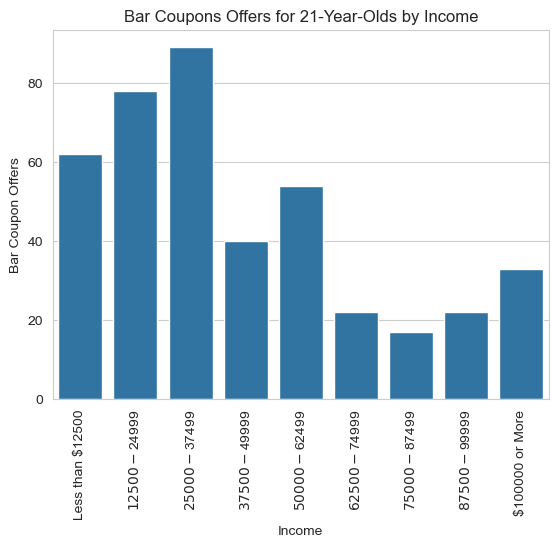

Text(0.5, 1.0, 'Bar Coupons Offers for People With Some High School Education by Income')

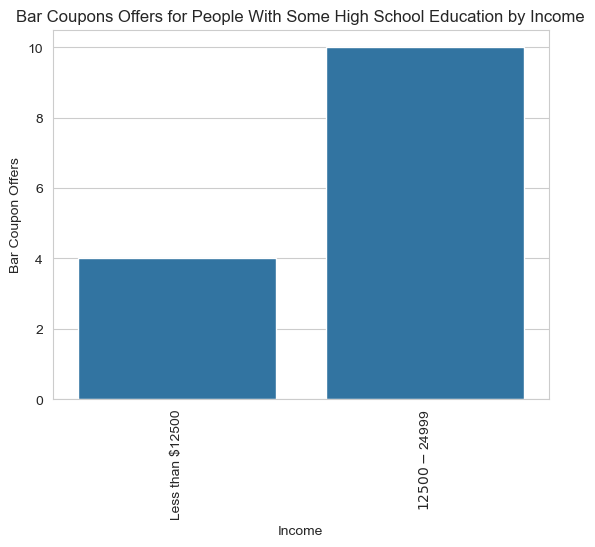

In [65]:
income_order=["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999", "$50000 - $62499", "$62500 - $74999", "$75000 - $87499", "$87500 - $99999", "$100000 or More"]

data_justBarCoupons_21 = data_justBarCoupons[data_justBarCoupons["age"] == "21"]
data_justBarCoupons_someHighSchool = data_justBarCoupons[data_justBarCoupons["education"] == "Some High School"]
sns.countplot(data_justBarCoupons_21, x = "income", order=income_order)
plt.xticks(rotation=90)
plt.xlabel("Income")
plt.ylabel("Bar Coupon Offers")
plt.title("Bar Coupons Offers for 21-Year-Olds by Income")
plt.show()

plt.clf()
sns.countplot(data_justBarCoupons_someHighSchool, x = "income", order=["Less than $12500", "$12500 - $24999"])
plt.xticks(rotation=90)
plt.xlabel("Income")
plt.ylabel("Bar Coupon Offers")
plt.title("Bar Coupons Offers for People With Some High School Education by Income")

Looks like the 21-year-olds have a mid-low income, and the "some high school education" group doesn't have anybody making much money at all.
The answer is a definitive "no."
The next question would be: what age group does have all these high-earning drinkers?

### What are the demographics like for just couples (people driving with partners)? Just couples getting coffee coupons?
"Demographics" is pretty vague. Let's just look at age groups.

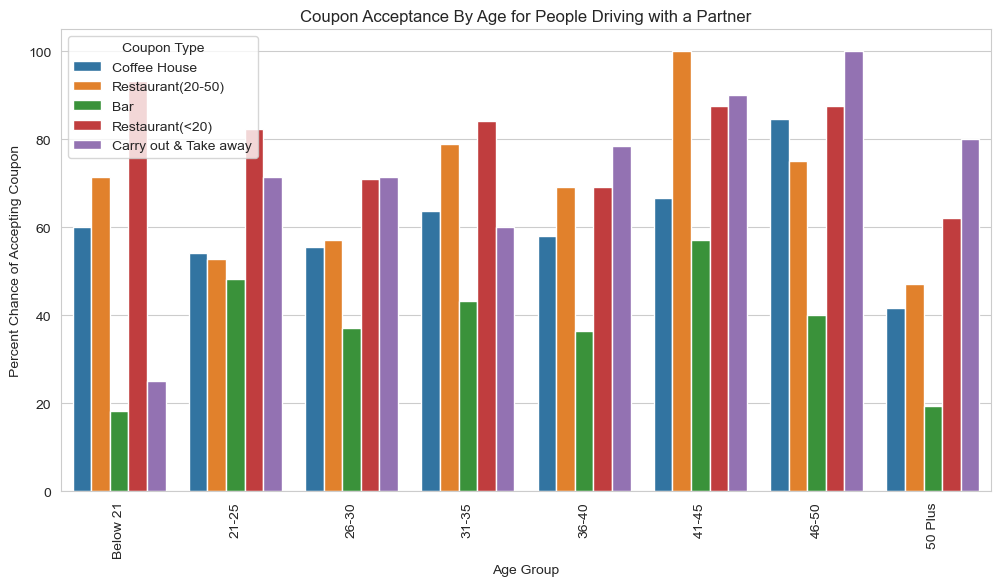

In [67]:
data_justCouples = data[data["passenger"] == "Partner"]

age_order = ["below21", "21", "26", "31", "36", "41", "46", "50plus"]
age_labels = ["Below 21", "21-25", "26-30", "31-35", "36-40", "41-45", "46-50", "50 Plus"]

#sns.barplot(data_justCouples)
#couples_plot = sns.barplot(data_justCouples, x="coupon", y="Y", estimator=lambda x: sum(x)/len(x))
plt.figure(figsize=(12, 6))
couples_age_plot = sns.barplot(data_justCouples, x="age", y="Y", hue="coupon", errorbar=None, order=age_order, estimator=lambda x: sum(x)/len(x)*100)
couples_age_plot.xaxis.set_ticks(ticks=np.arange(len(age_order)), labels=age_labels)
plt.xticks(rotation=90)
plt.xlabel("Age Group")
plt.ylabel("Percent Chance of Accepting Coupon")
plt.title("Coupon Acceptance By Age for People Driving with a Partner")
plt.legend(title="Coupon Type")

There may not be enough data on people driving with partners. Two bars reach 100%, which implies too few data points there, I think.
There are a few things to note here: Coupon acceptance drops off at age 50+, and bar coupons are not as popular as other coupons.
Seeing as the question was vaguely about demographics, a decent follow-up wouldbe to create a similar chart for incomes instead of ages.

### It's probably not raining while it's 80 degrees out, so what are the groups getting coffee in the rain vs when it's 80 degrees?
That's too broad a question, so we're gonna look at weather and temperature for coffee coupons.

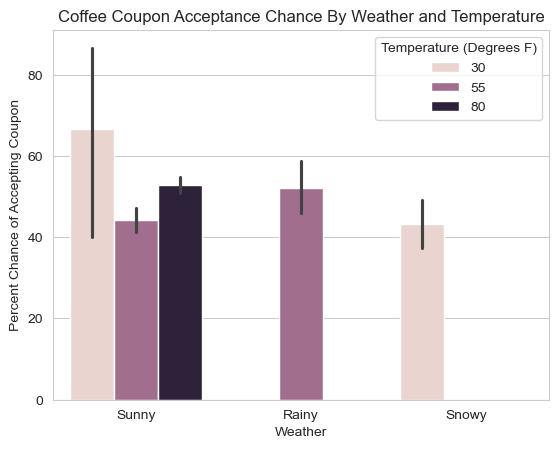

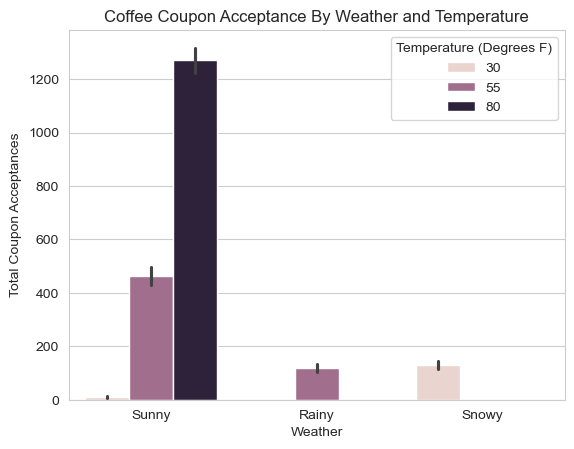

In [69]:
sns.barplot(data_justCoffeeCoupons, x="weather", y="Y", hue="temperature", estimator=lambda x: sum(x)/len(x)*100)
plt.xlabel("Weather")
plt.ylabel("Percent Chance of Accepting Coupon")
plt.title("Coffee Coupon Acceptance Chance By Weather and Temperature")
plt.legend(title="Temperature (Degrees F)")
plt.show()

plt.clf()
sns.barplot(data_justCoffeeCoupons, x="weather", y="Y", hue="temperature", estimator=sum)
plt.xlabel("Weather")
plt.ylabel("Total Coupon Acceptances")
plt.title("Coffee Coupon Acceptance By Weather and Temperature")
plt.legend(title="Temperature (Degrees F)")

Looks like people are most likely to accept coffee coupons when it's very cold, but not rainy or snowy.
That makes sense. Coffee is warm, but it's inconvenient to go out when the weather isn't clear.
We can also see that most of the data comes from when it's sunny and hot, hence the big error bar on the cold and sunny bar (I think).
It would be interesting to create similar charts for each type of coupon.

### Just what's the deal with divorcees and coffee?
This one's very vague, but I suspect looking at age will be the most enlightening.

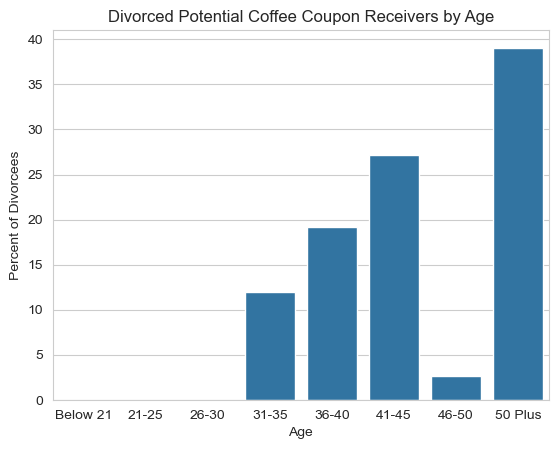

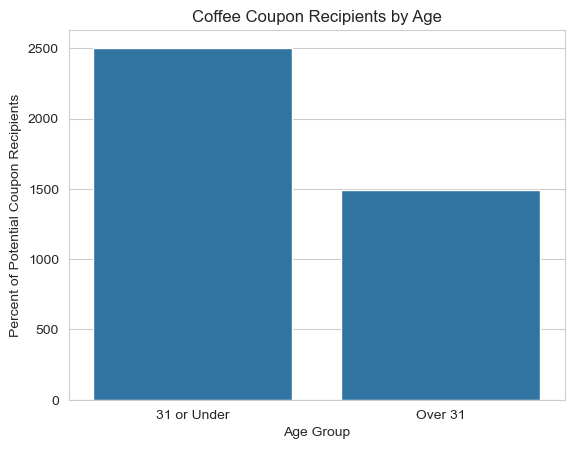

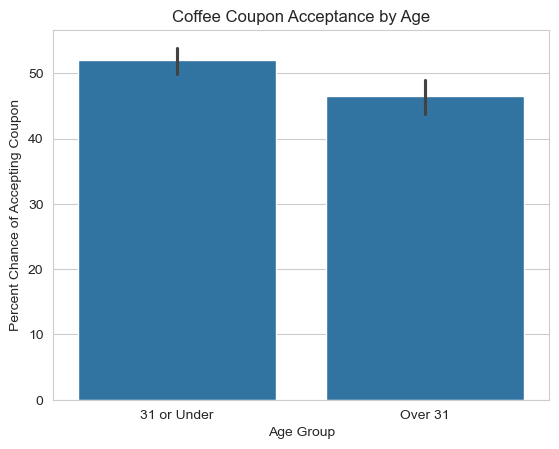

In [71]:
data_justCoffeeCoupons_divorced = data_justCoffeeCoupons[ data_justCoffeeCoupons["maritalStatus"] == "Divorced" ]
data_justCoffeeCoupons_over31 = (data_justCoffeeCoupons["age_simplified_inaccurate"] > 31).astype(int)



coffee_divorced_plot = sns.countplot(data_justCoffeeCoupons_divorced, x="age", stat="percent", order=age_order)
plt.xlabel("Age")
plt.ylabel("Percent of Divorcees")
plt.title("Divorced Potential Coffee Coupon Receivers by Age")
coffee_divorced_plot.xaxis.set_ticks(ticks=np.arange(len(age_order)), labels=age_labels)
plt.show()

plt.clf()
coffee_underOver31_plot = sns.countplot(data_justCoffeeCoupons, x=data_justCoffeeCoupons_over31)
plt.xlabel("Age Group")
plt.ylabel("Percent of Potential Coupon Recipients")
plt.title("Coffee Coupon Recipients by Age")
coffee_underOver31_plot.xaxis.set_ticks(ticks=np.arange(2), labels=["31 or Under", "Over 31"])
plt.show()

plt.clf()
coffee_underOver31_acceptance_plot = sns.barplot(data_justCoffeeCoupons, x=data_justCoffeeCoupons_over31, y="Y", estimator=lambda x: sum(x)/len(x)*100)
plt.xlabel("Age Group")
plt.ylabel("Percent Chance of Accepting Coupon")
plt.title("Coffee Coupon Acceptance by Age")
coffee_underOver31_acceptance_plot.xaxis.set_ticks(ticks=np.arange(2), labels=["31 or Under", "Over 31"])

Well, we can at least see that all divorced people come from the 31+ age group, and that there are more potential coffee coupon recipients over 31.
We can also see, however, that people under 31 are more likely to accept the coupons they receive.
I think the answer, then, is that more divorcees are *receiving* coffee coupons overall, so more are accepting them?
Maybe a divorcee count plot by coupon type is in order.

### What are the hours that healthcare/technical workers and maintenance/cleaning workers accept coffee coupons?

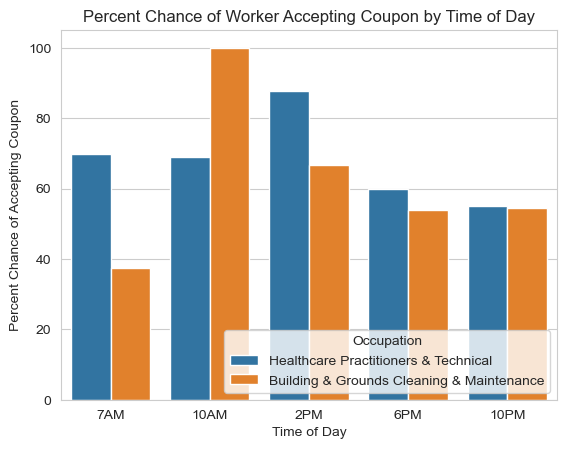

In [73]:
data_justHealthcareAndBuildingMaintenance = data[(data["occupation"] == "Healthcare Practitioners & Technical") | (data["occupation"] == "Building & Grounds Cleaning & Maintenance")]
time_order = ["7AM", "10AM", "2PM", "6PM", "10PM"]

sns.barplot(data_justHealthcareAndBuildingMaintenance, x="time", y="Y", hue="occupation", order=time_order, errorbar=None, estimator=lambda x: sum(x)/len(x)*100)
plt.xlabel("Time of Day")
plt.ylabel("Percent Chance of Accepting Coupon")
plt.title("Percent Chance of Worker Accepting Coupon by Time of Day")
plt.legend(loc="lower right", title="Occupation")

Healthcare practitioners are much more likely to accept coupons at 7AM and 2PM (and slightly more likely at 6PM ans 10PM),
while building maintenance workers are more likely to accept coupons at at 10AM.
If I had to guess, I'd say it has something to do with work hours.
Like I wrote before, I'd be interested in finding which occupations are most similar to one another and grouping them.
It would also be worth looking at overall coupon acceptance by time of day.

### Education and age might be correlated. Maybe I should check that.

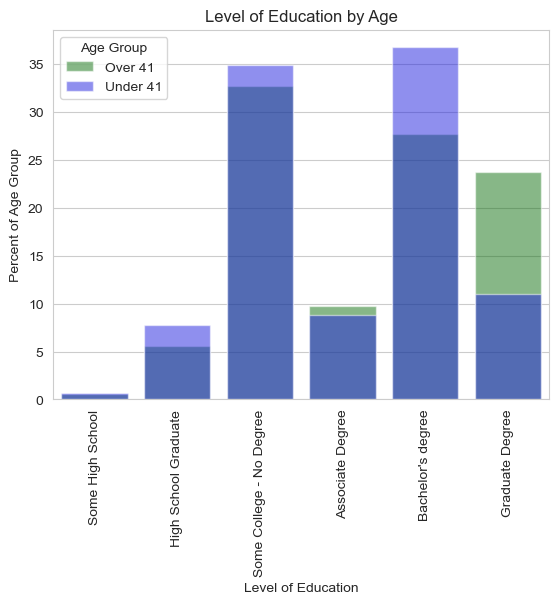

In [75]:
data_41Plus = data[ data["age_simplified_inaccurate"] >= 41 ]
data_Under41 = data[ data["age_simplified_inaccurate"] < 41 ]
degree_order = ["Some High School", "High School Graduate", "Some college - no degree", "Associates degree", "Bachelors degree", "Graduate degree (Masters or Doctorate)"]
degree_labels = ["Some High School", "High School Graduate", "Some College - No Degree", "Associate Degree", "Bachelor's degree", "Graduate Degree"]


over40_education_plot = sns.countplot(data_41Plus, x="education", stat="percent", order=degree_order, color="green", alpha = 0.5)
over40_education_plot.xaxis.set_ticks(np.arange(len(degree_order)),labels=degree_labels)
plt.xticks(rotation=90)

under41_education_plot = sns.countplot(data_Under41, x="education", stat="percent", order=degree_order, color="blue", alpha = 0.5)
under41_education_plot.xaxis.set_ticks(np.arange(len(degree_order)),labels=degree_labels)
plt.xticks(rotation=90)
plt.xlabel("Level of Education")
plt.ylabel("Percent of Age Group")
plt.title("Level of Education by Age")
plt.legend(title="Age Group", labels=["Over 41", "Under 41"])

People under 41 are more likely to have bachelor's degrees and people over 41 are more likely to have graduate degrees.
Makes sense. It seems like there is a correlation.
A follow-up would be to check each age group individually or change the cutoff point.